In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [15]:
df = pd.read_csv("../resources/data/discords/dutch_power/power_data.txt",header=None,names=['consumption'])

In [16]:
df.head()

consumption
0          950
1          939
2          943
3          971
4         1014

In [17]:
num_values = "num_values: %s"%(df.shape[0])
print num_values

num_values: 35040


In [18]:
dates = pd.date_range('1/1/1997', periods=35040, freq='15Min')

In [19]:
df =df.set_index(dates)

In [20]:
df.head()

consumption
1997-01-01 00:00:00          950
1997-01-01 00:15:00          939
1997-01-01 00:30:00          943
1997-01-01 00:45:00          971
1997-01-01 01:00:00         1014

In [21]:
df.tail()

consumption
1997-12-31 22:45:00          622
1997-12-31 23:00:00          614
1997-12-31 23:15:00          627
1997-12-31 23:30:00          633
1997-12-31 23:45:00          882

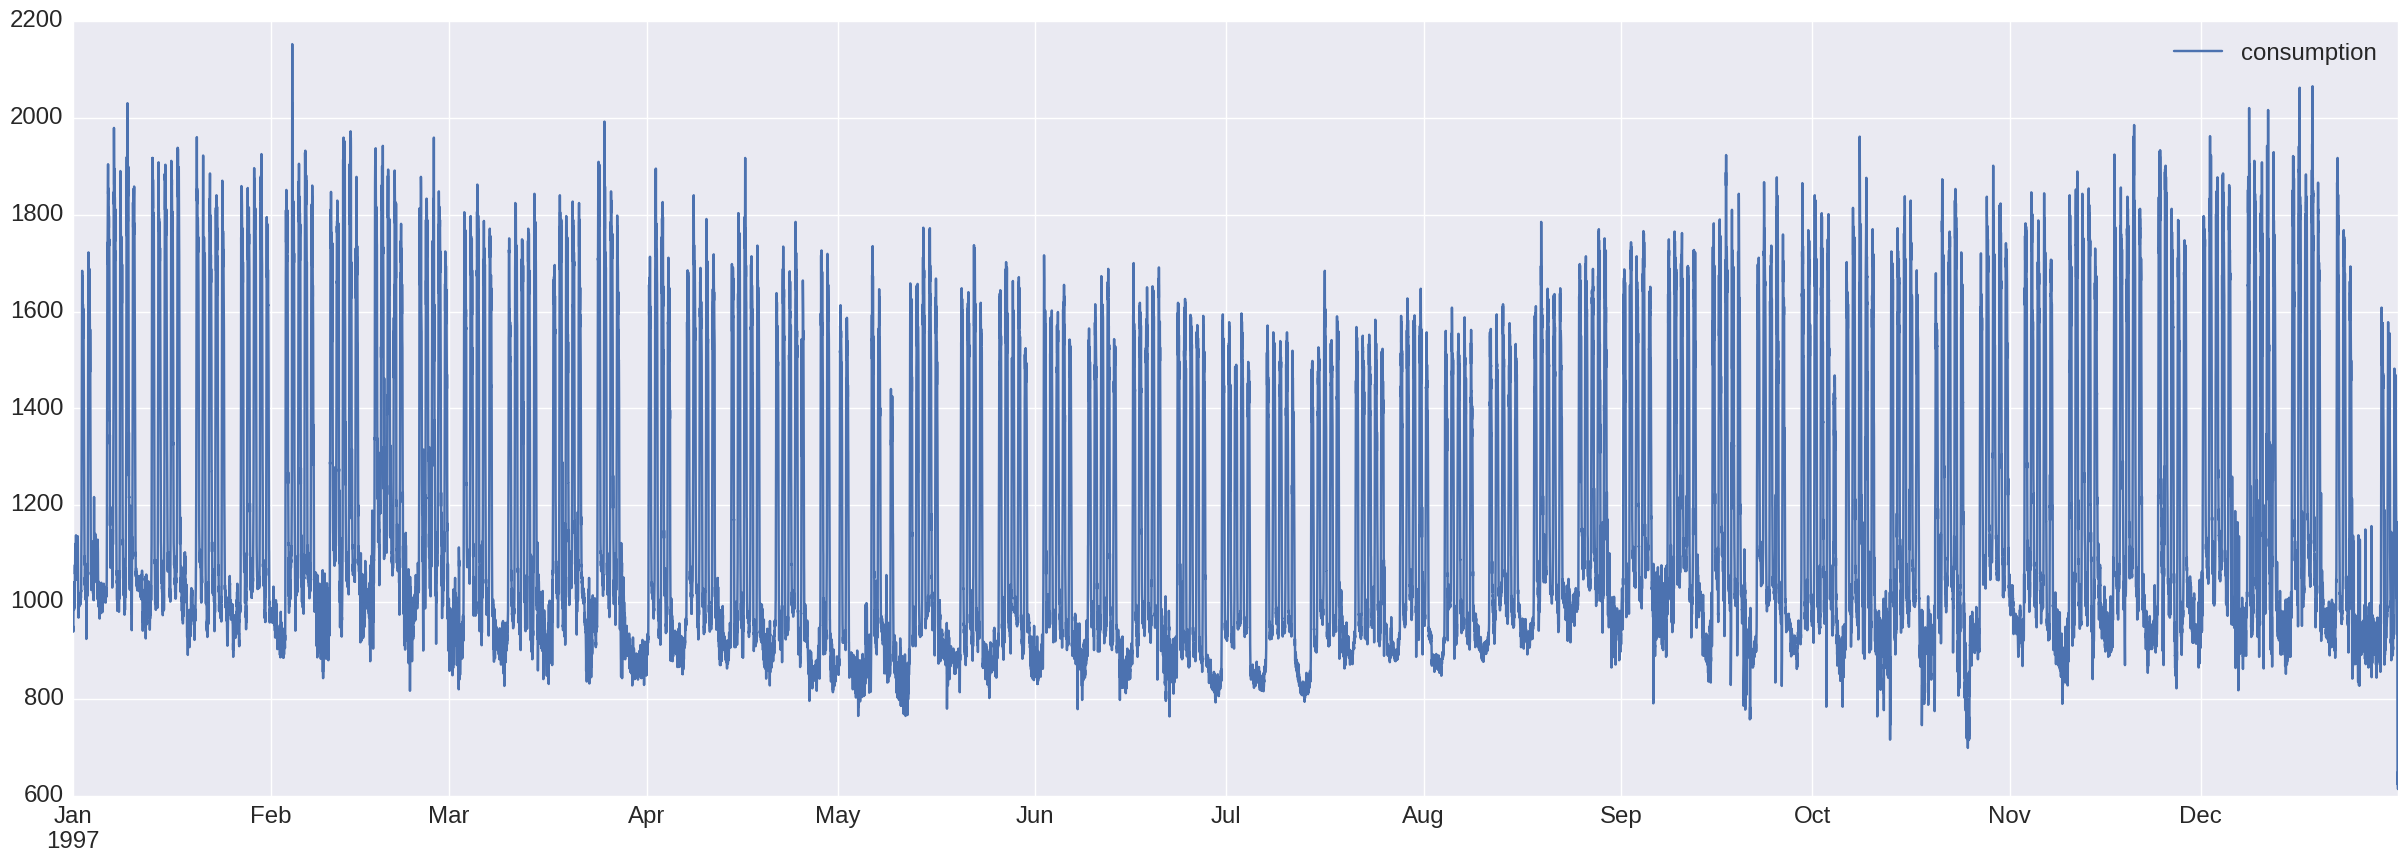

In [22]:
df.plot(figsize=(30,10))
plt.show()

In [23]:
# df = df.resample('1H').sum()
# df.head()

In [24]:
#df.tail()

In [25]:
#drop days from 1 to 5 jan to start from a monday.
df = df['1997-01-06':]
#add anomaly column
df['anomaly'] = 0
df.head()

consumption  anomaly
1997-01-06 00:00:00         1008        0
1997-01-06 00:15:00         1001        0
1997-01-06 00:30:00         1009        0
1997-01-06 00:45:00         1009        0
1997-01-06 01:00:00         1001        0

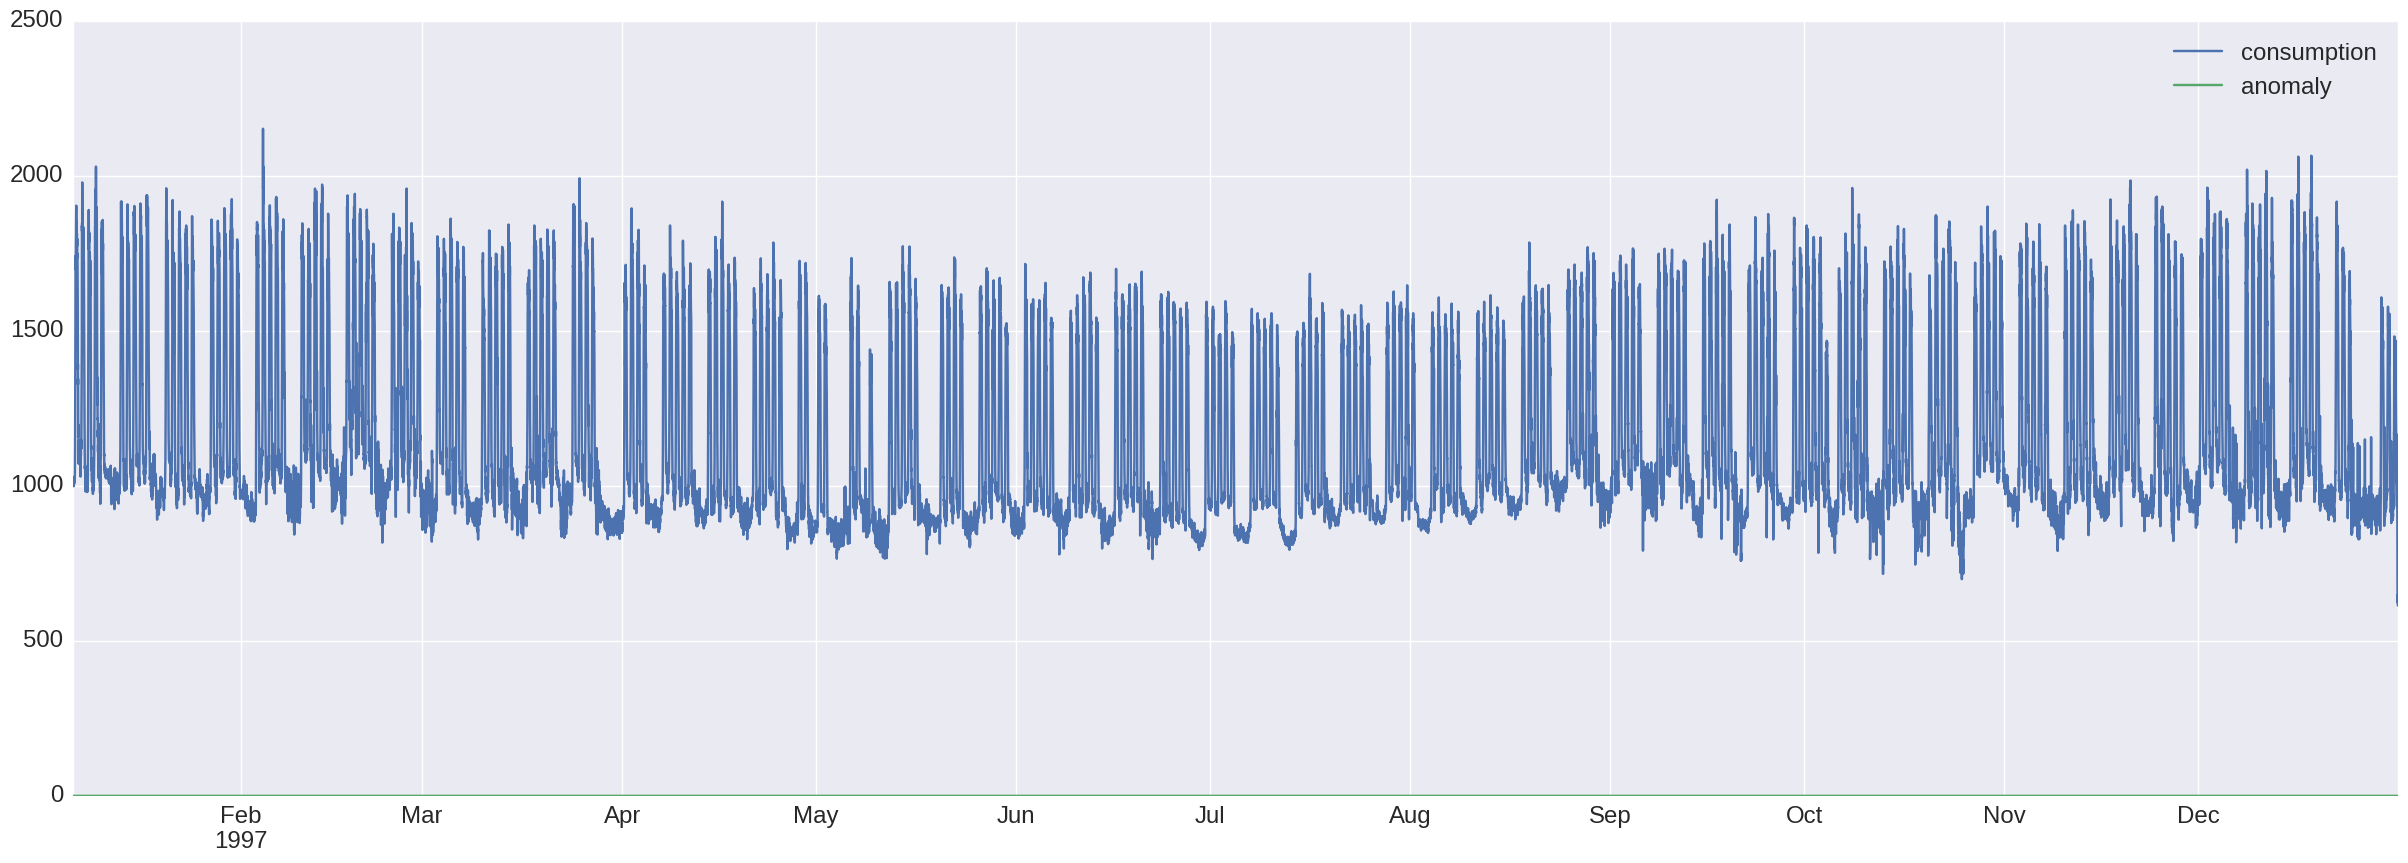

In [26]:
df.plot(figsize=(30,10))
plt.show()

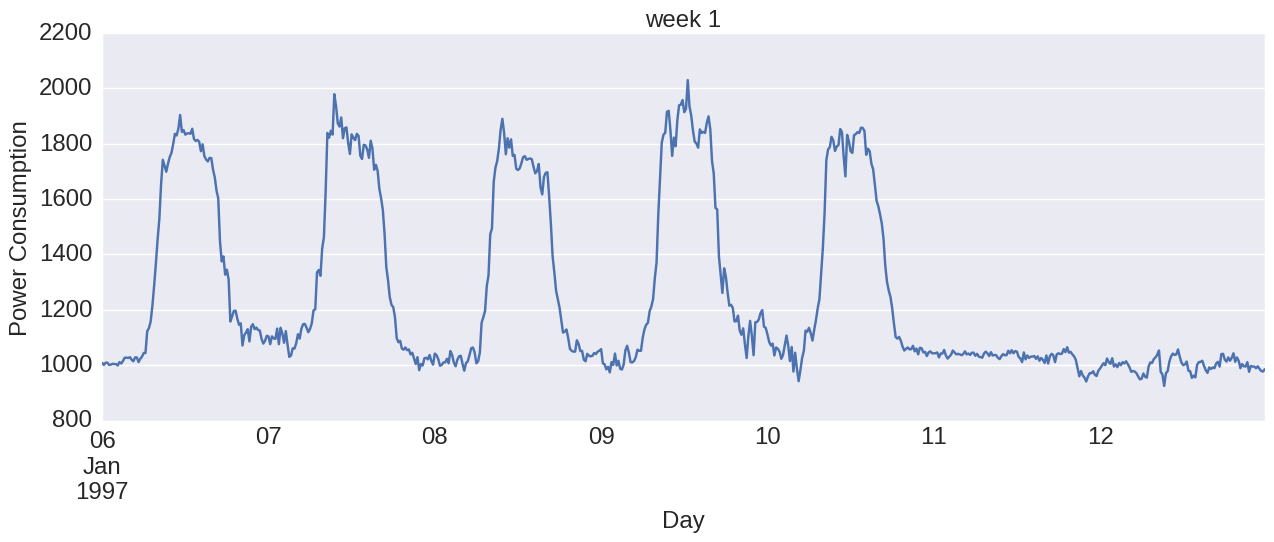

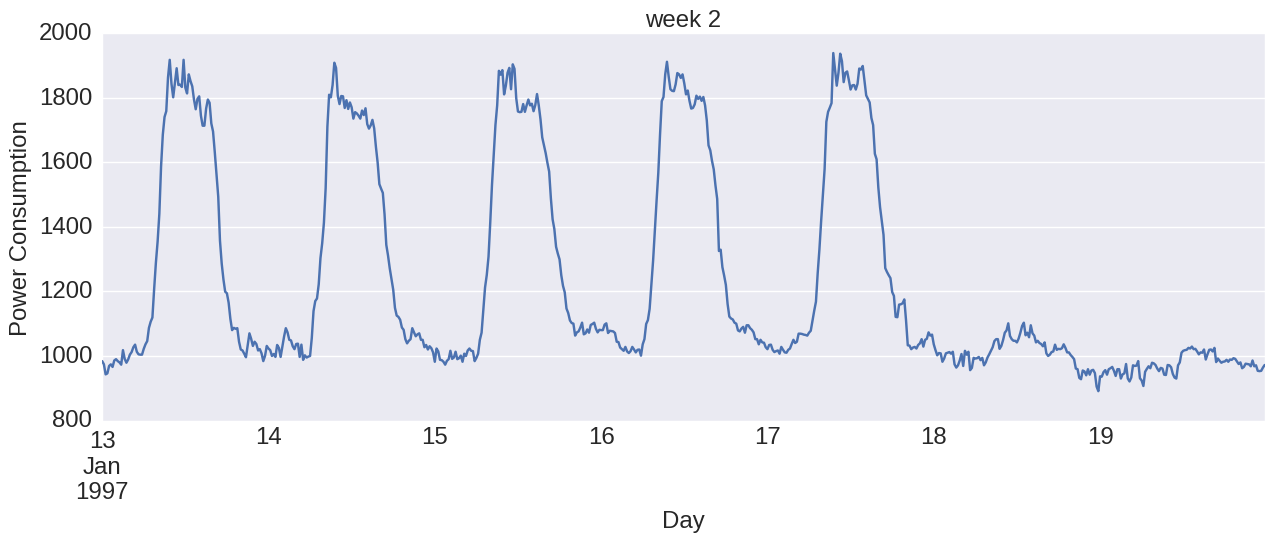

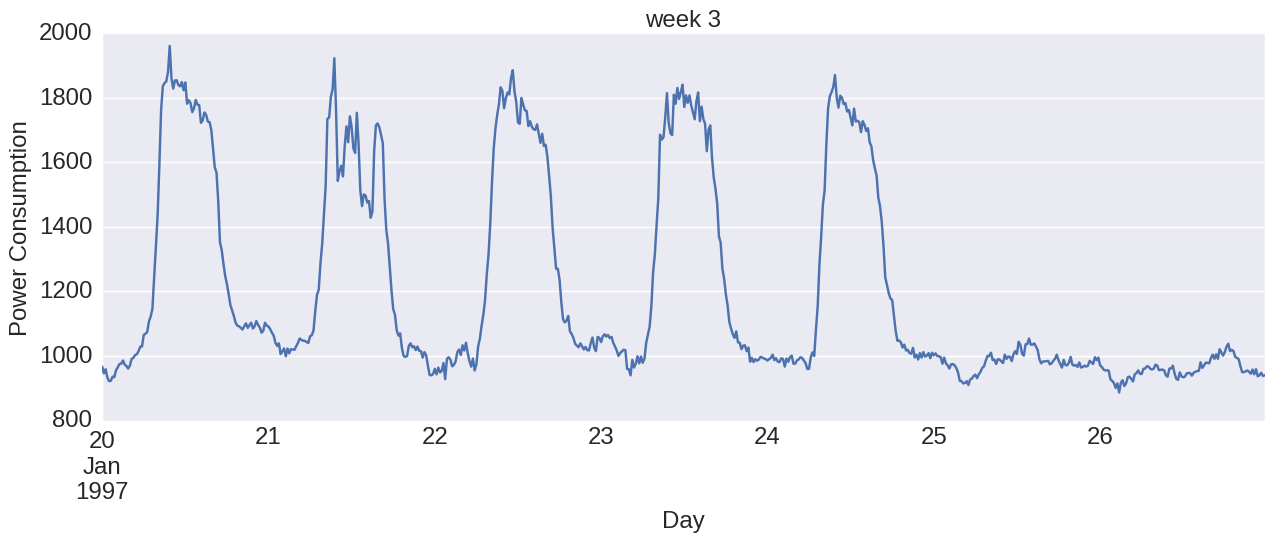

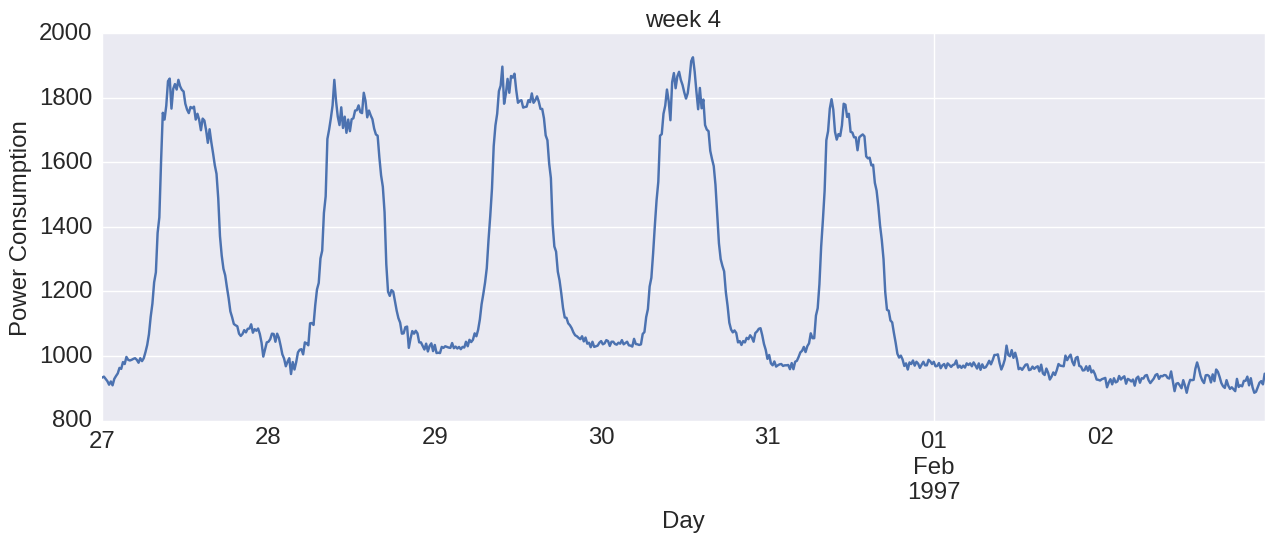

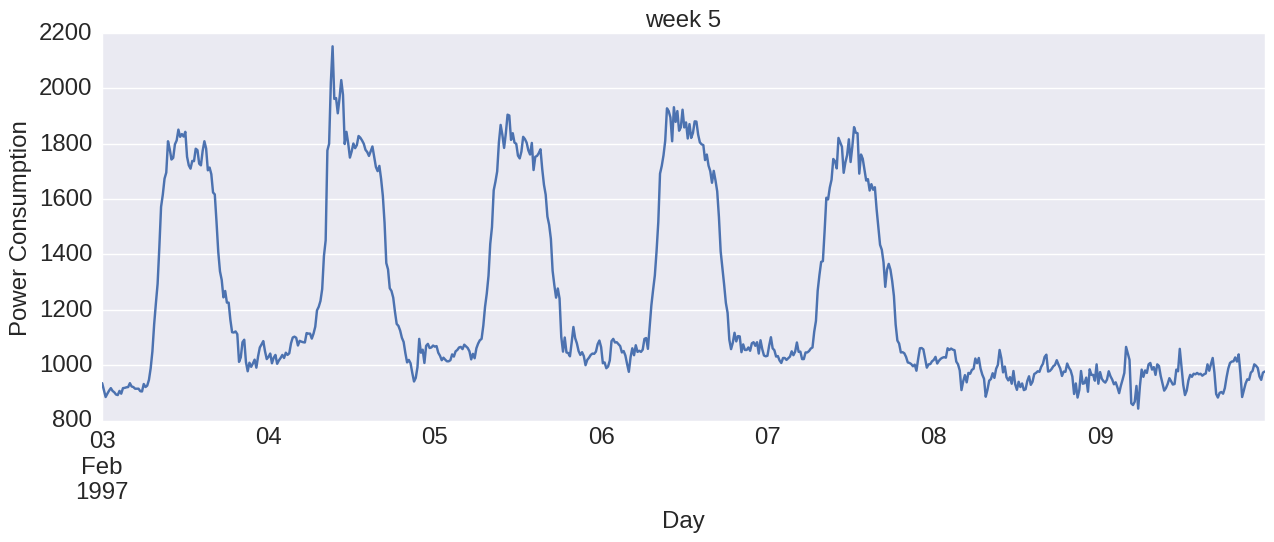

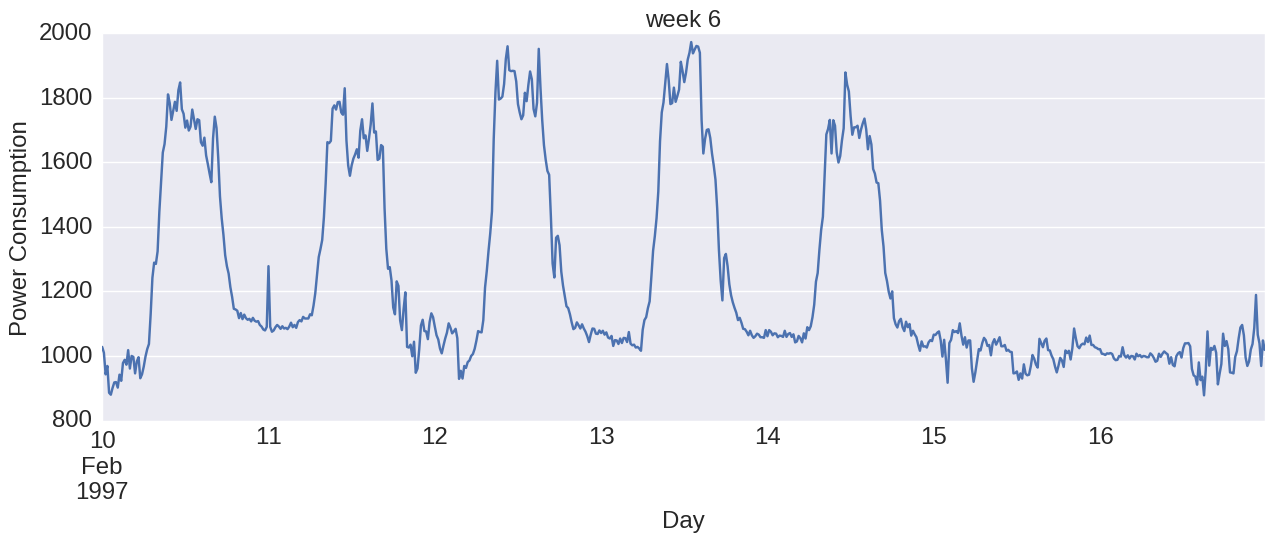

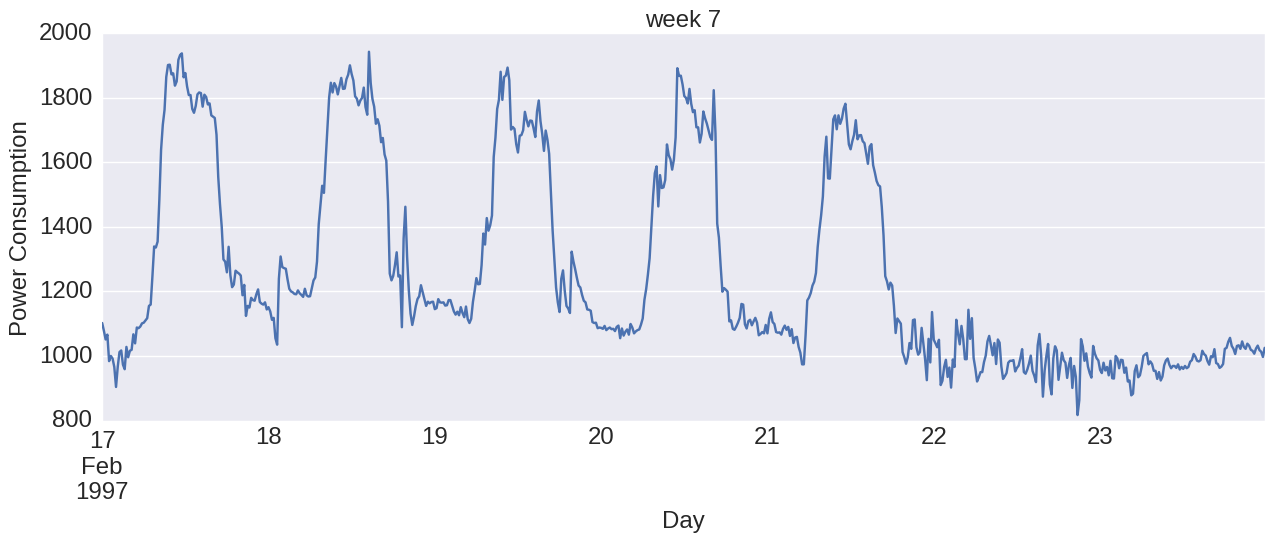

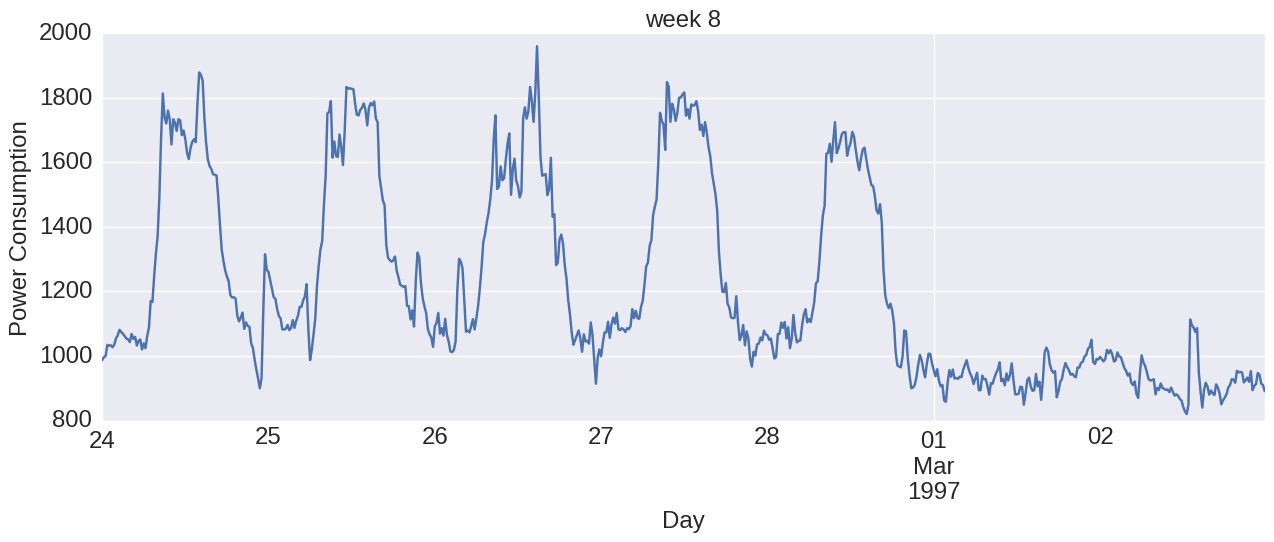

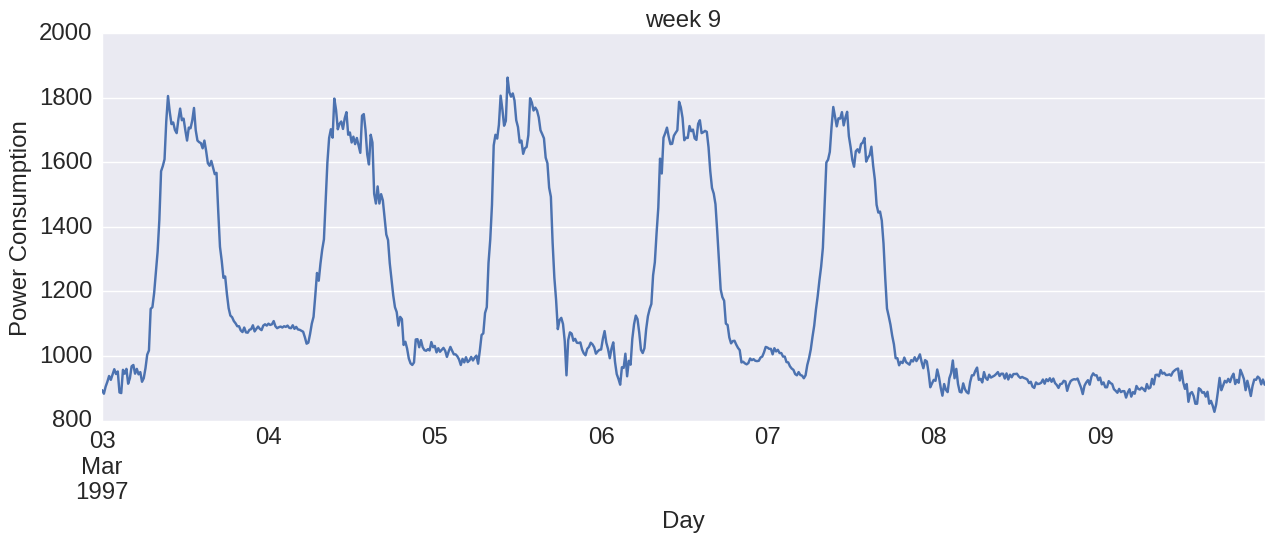

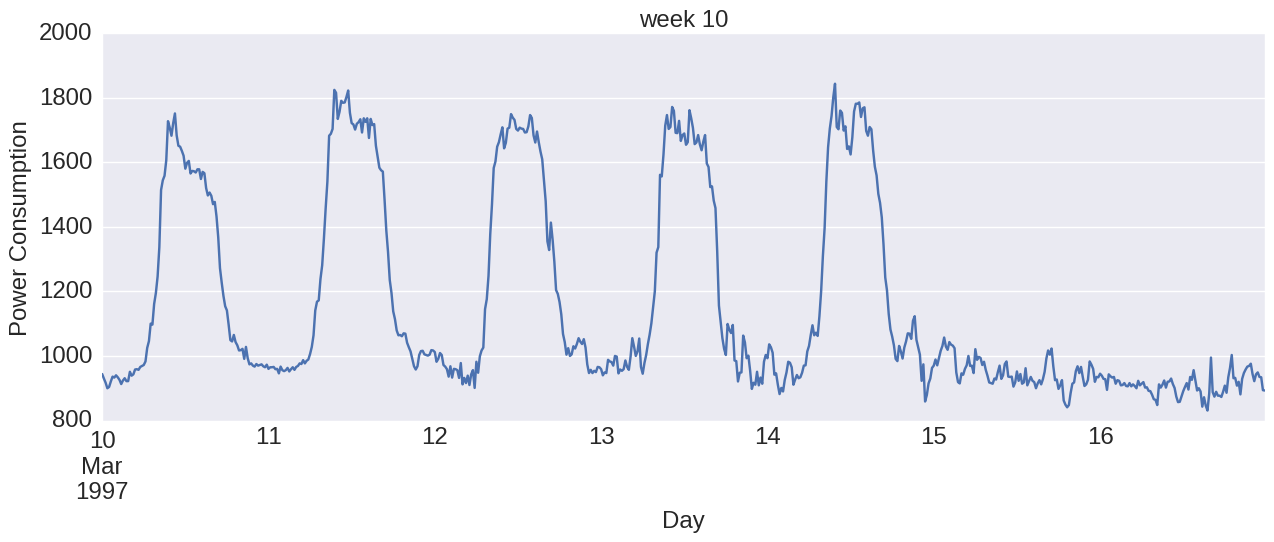

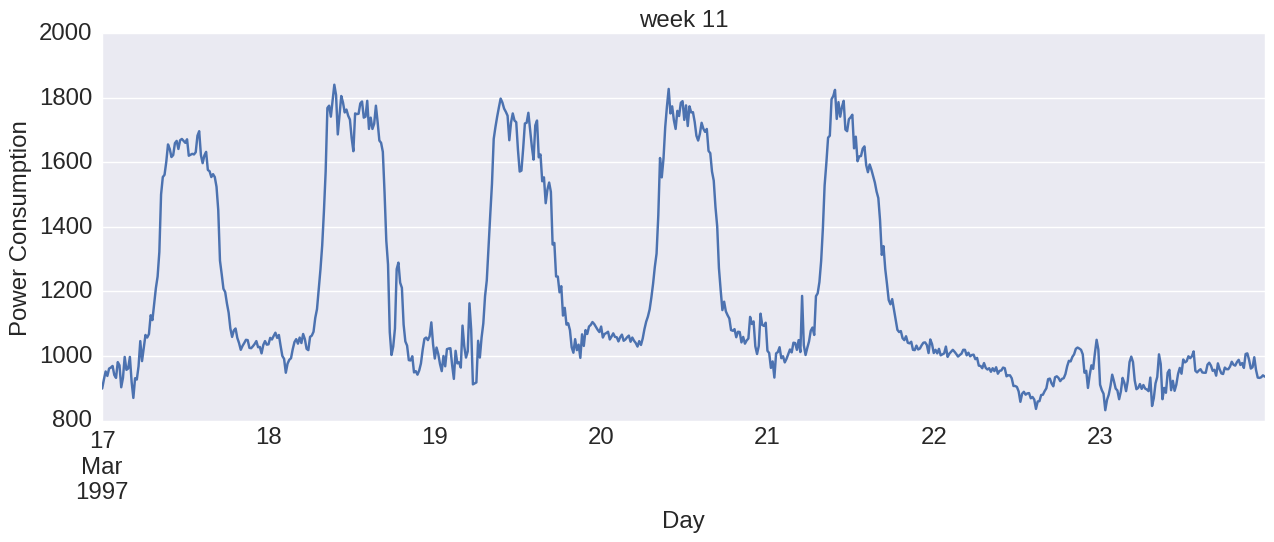

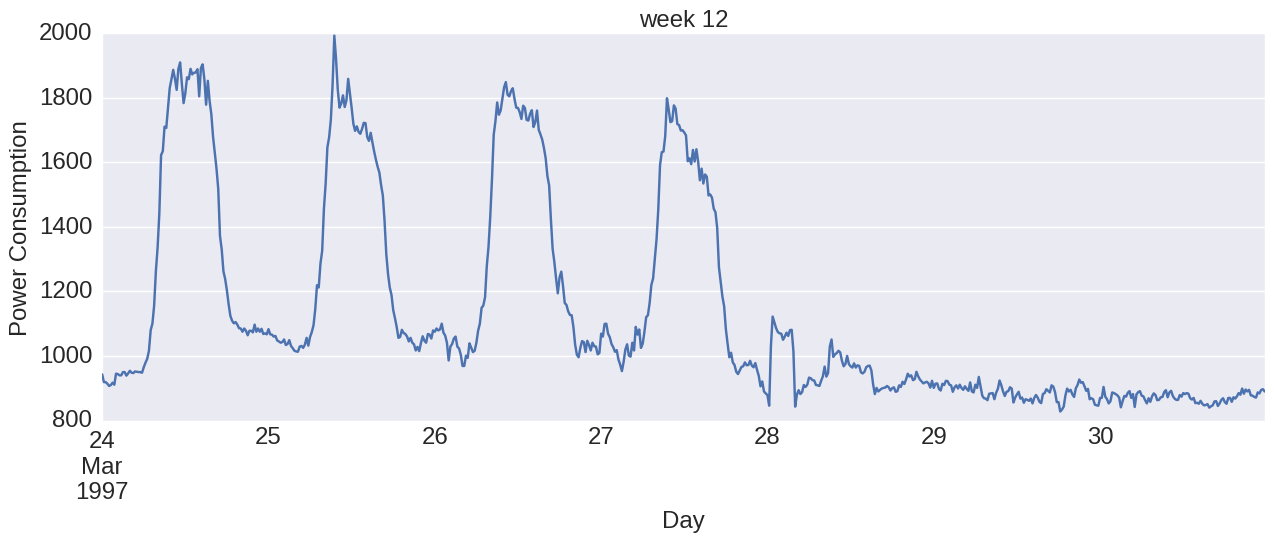

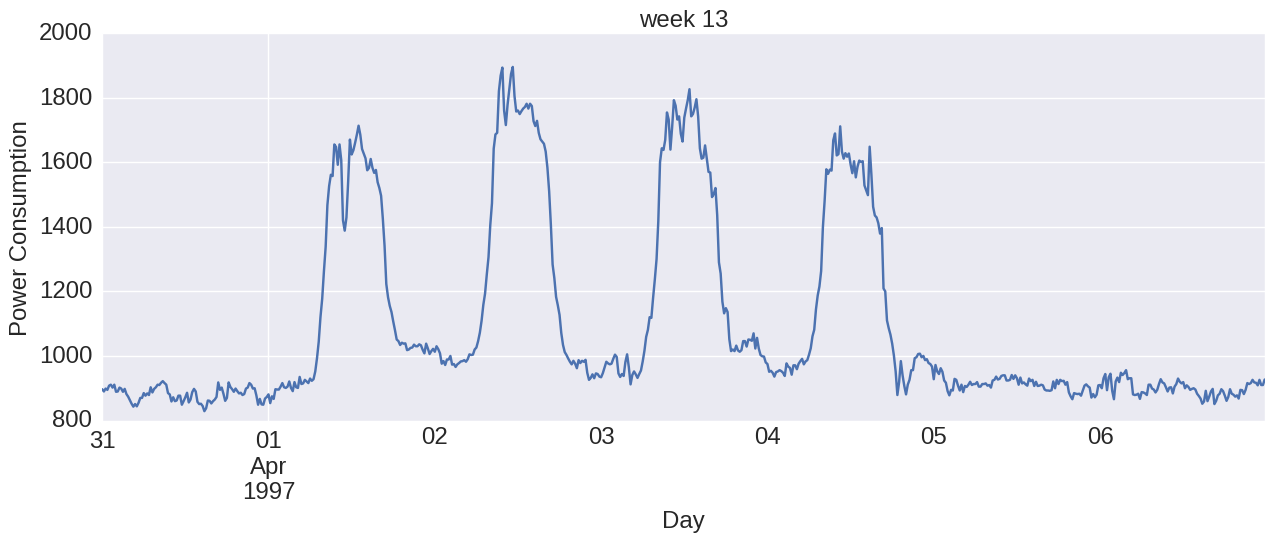

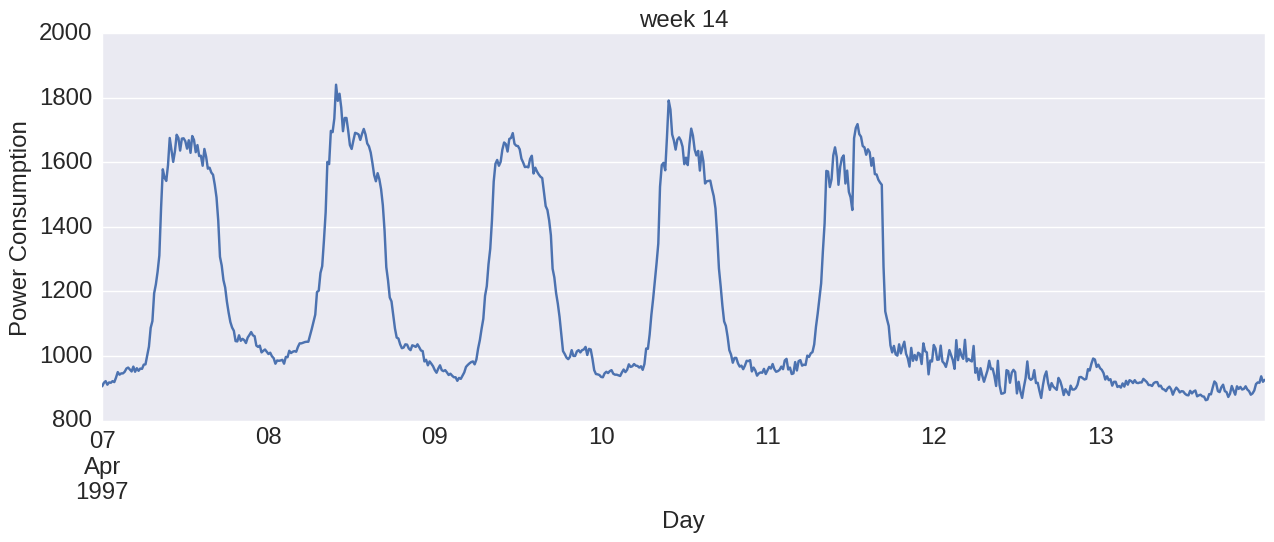

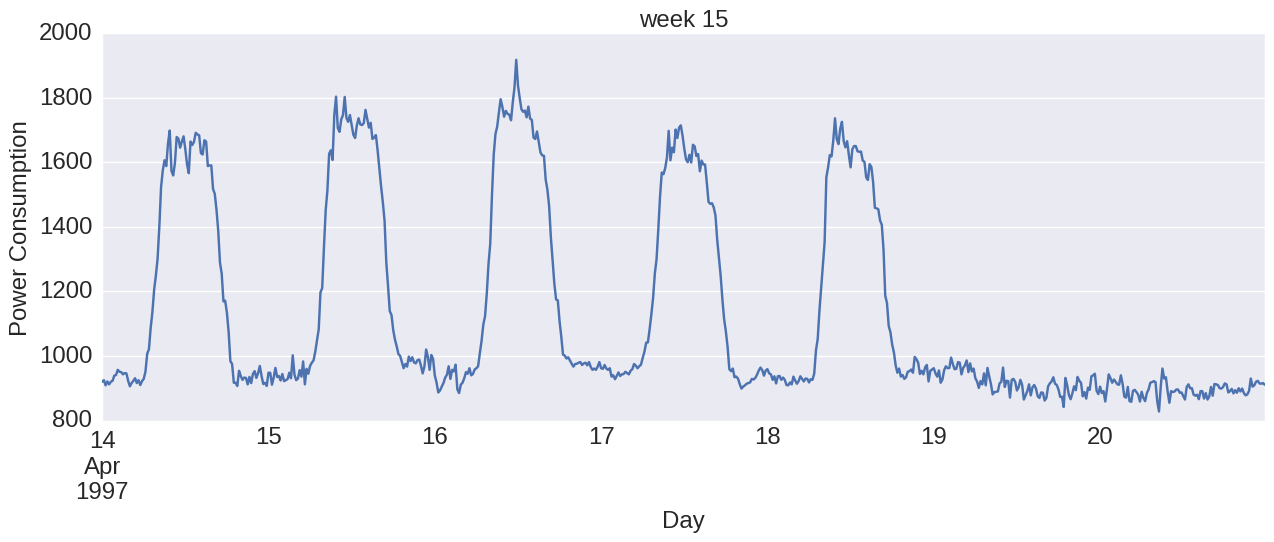

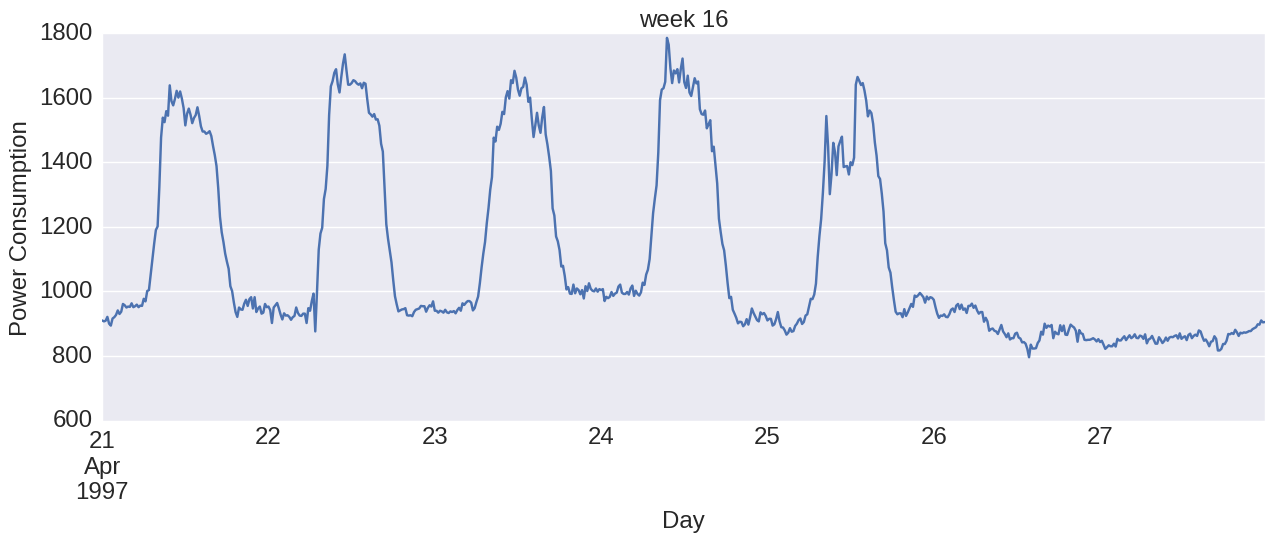

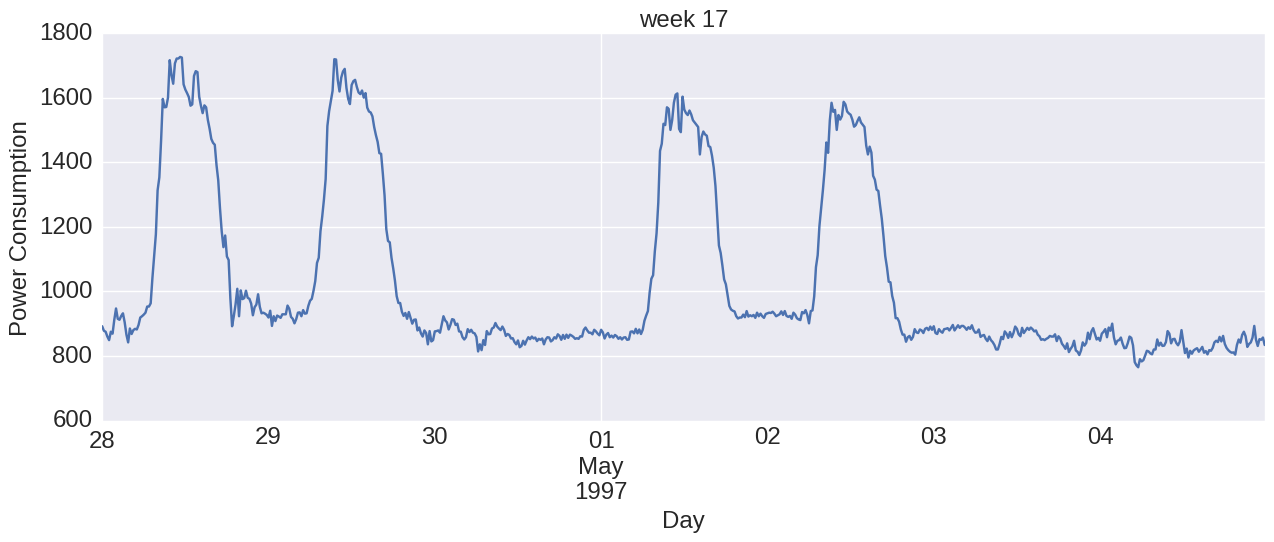

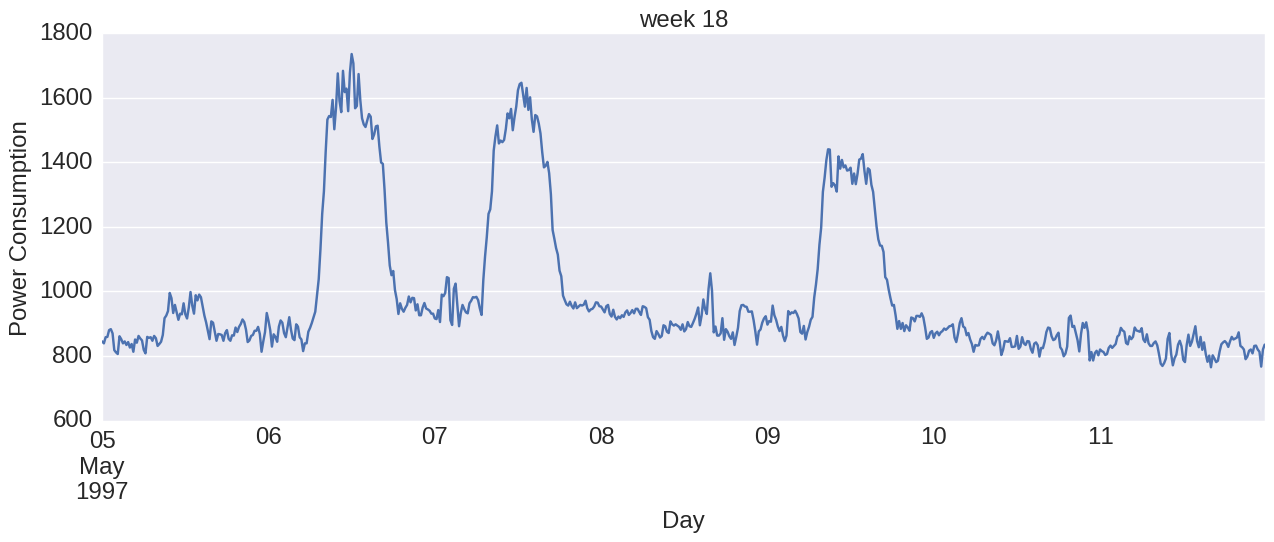

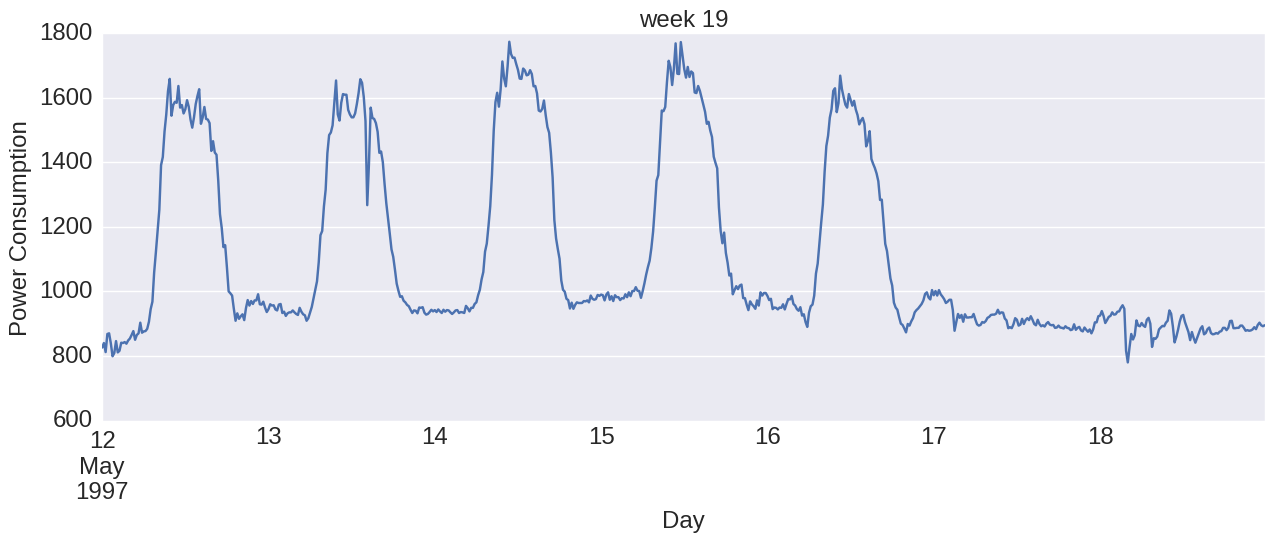

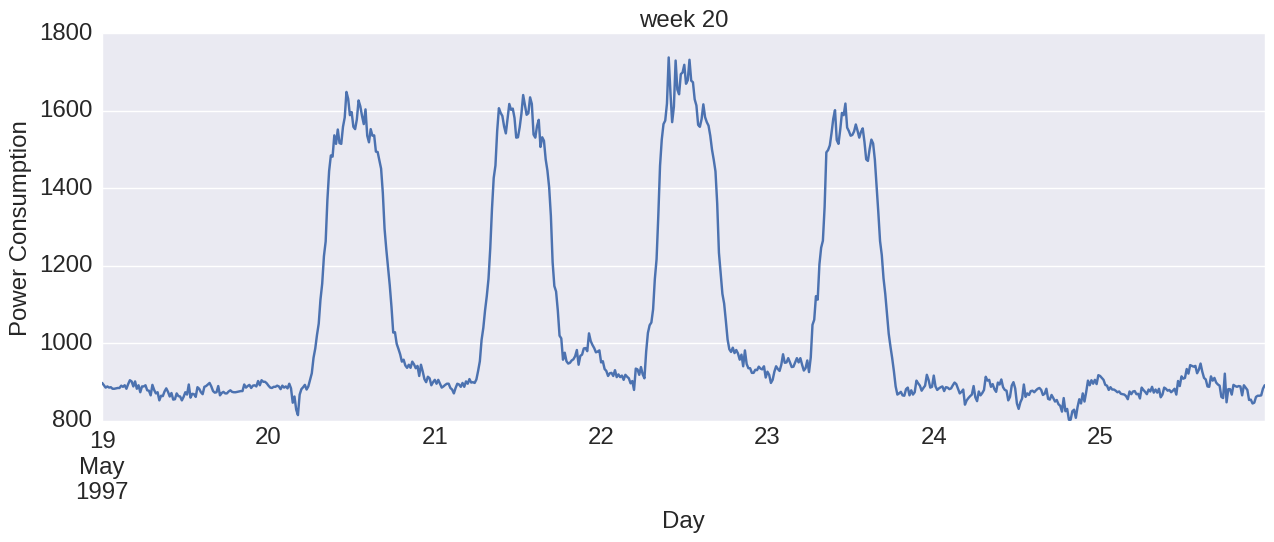

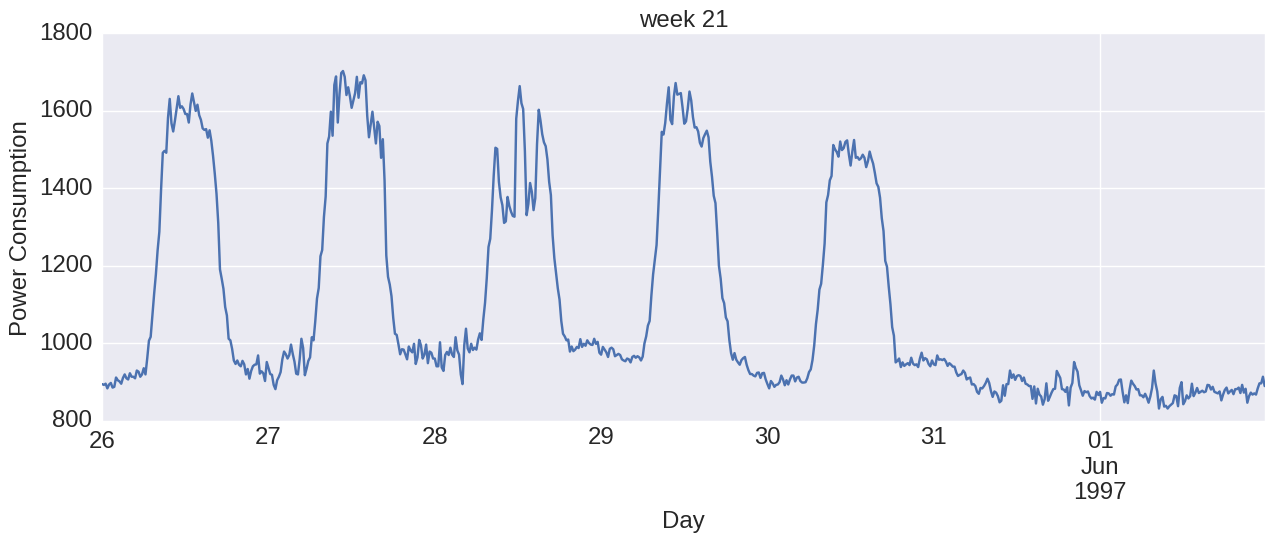

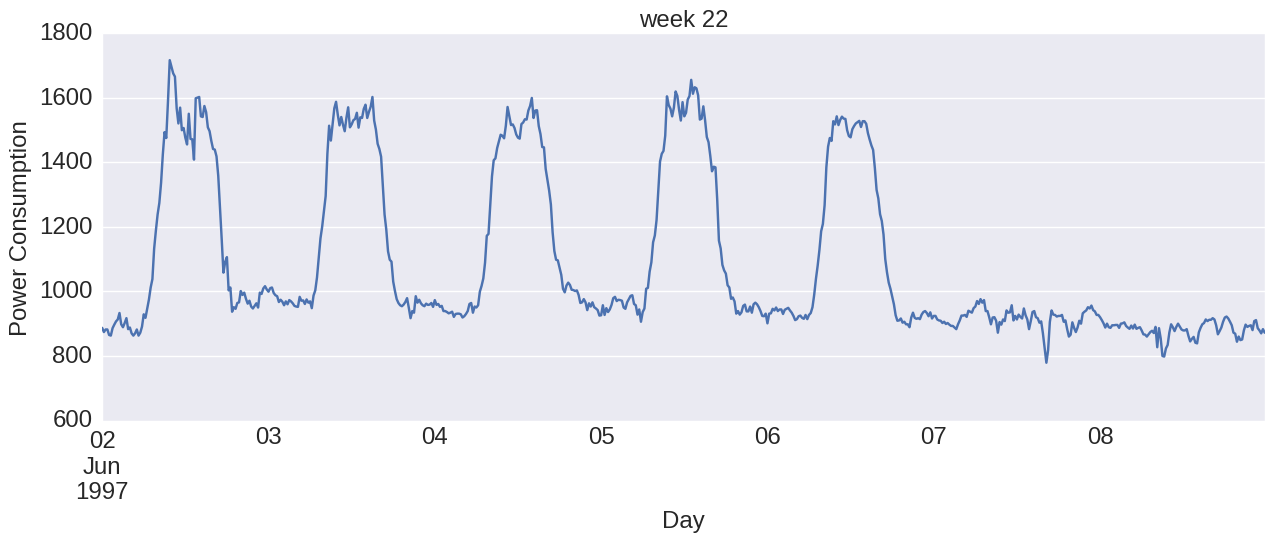

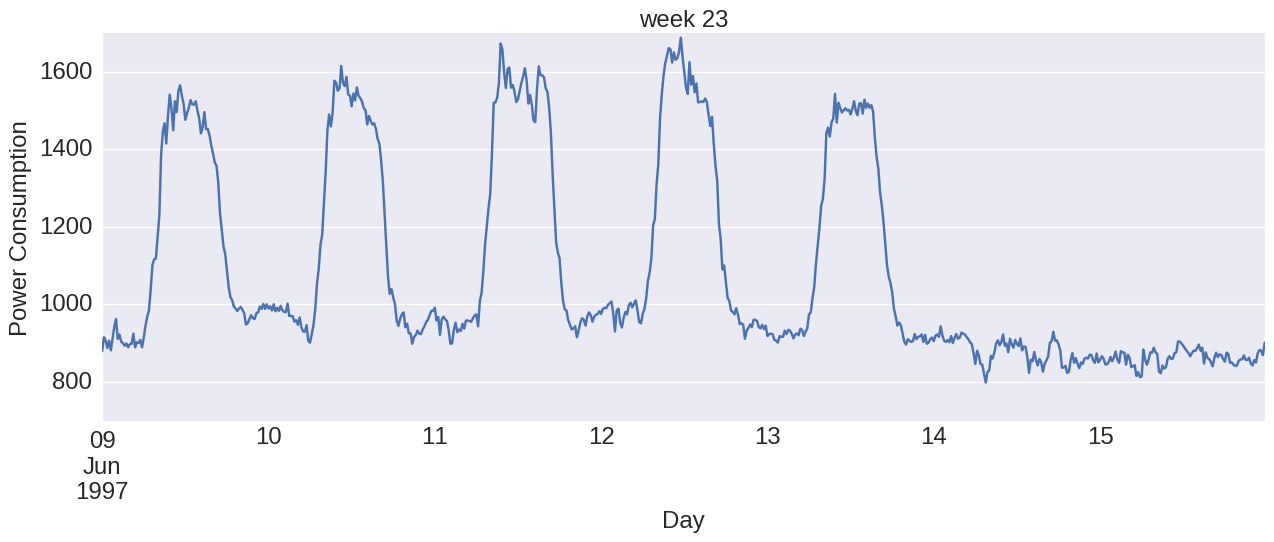

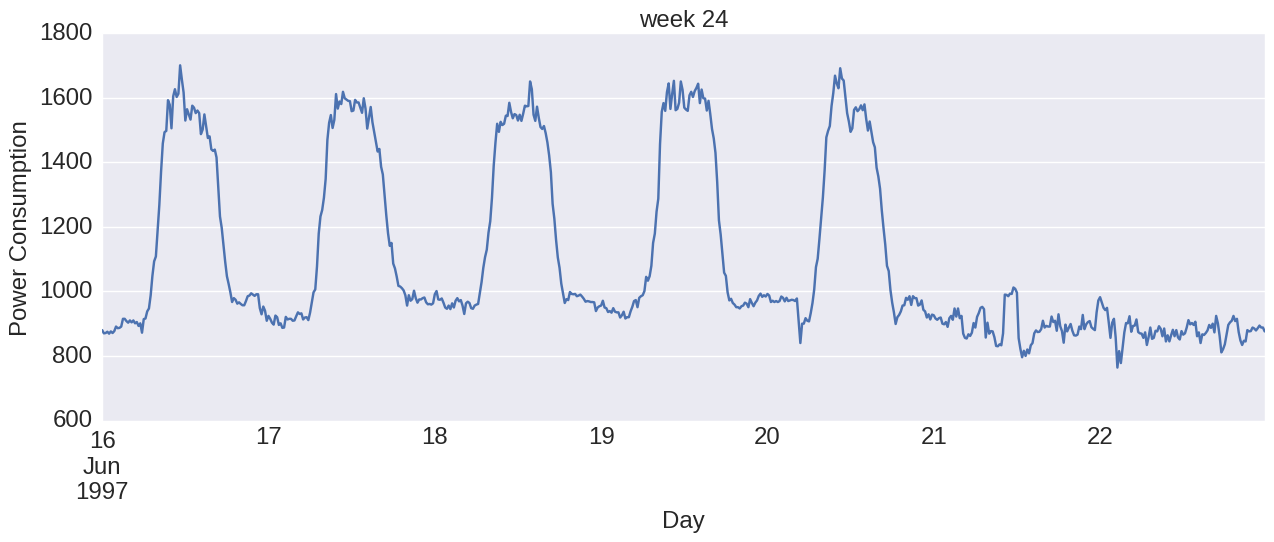

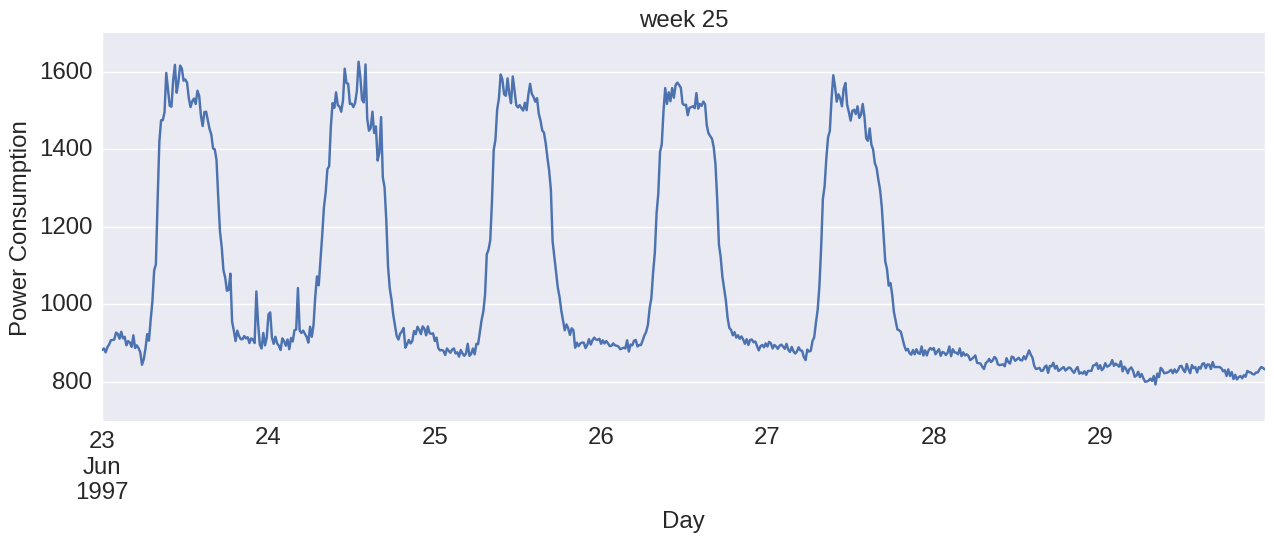

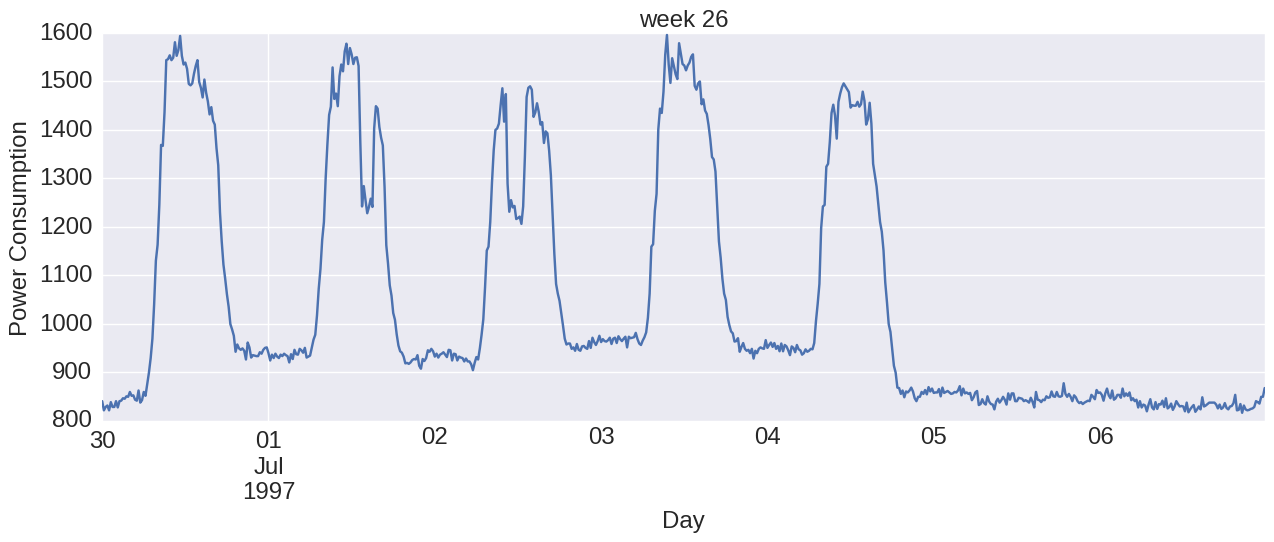

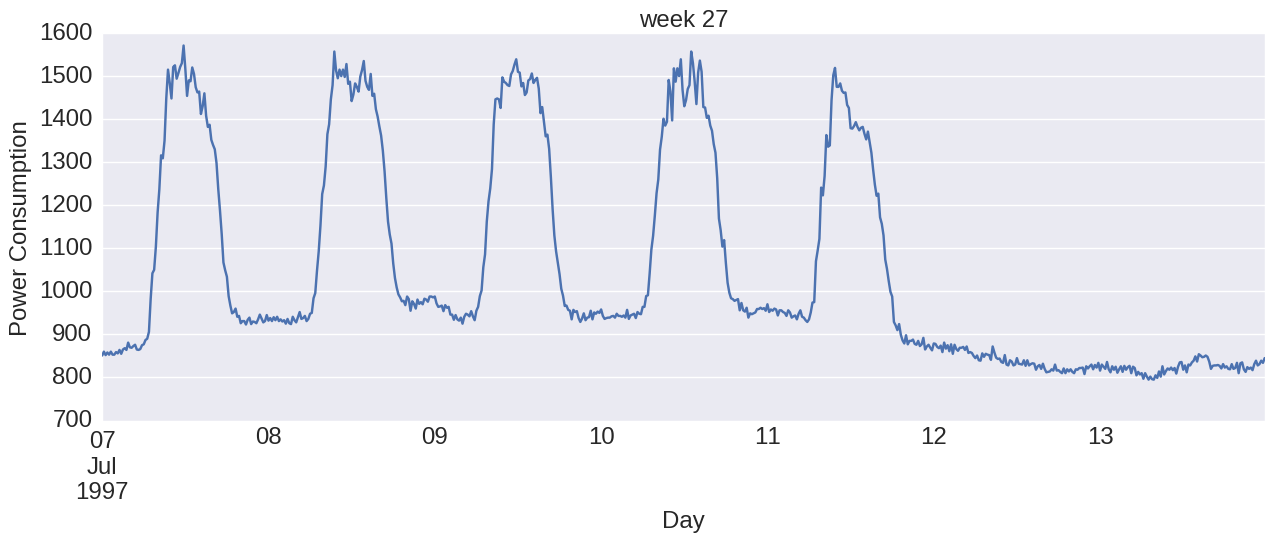

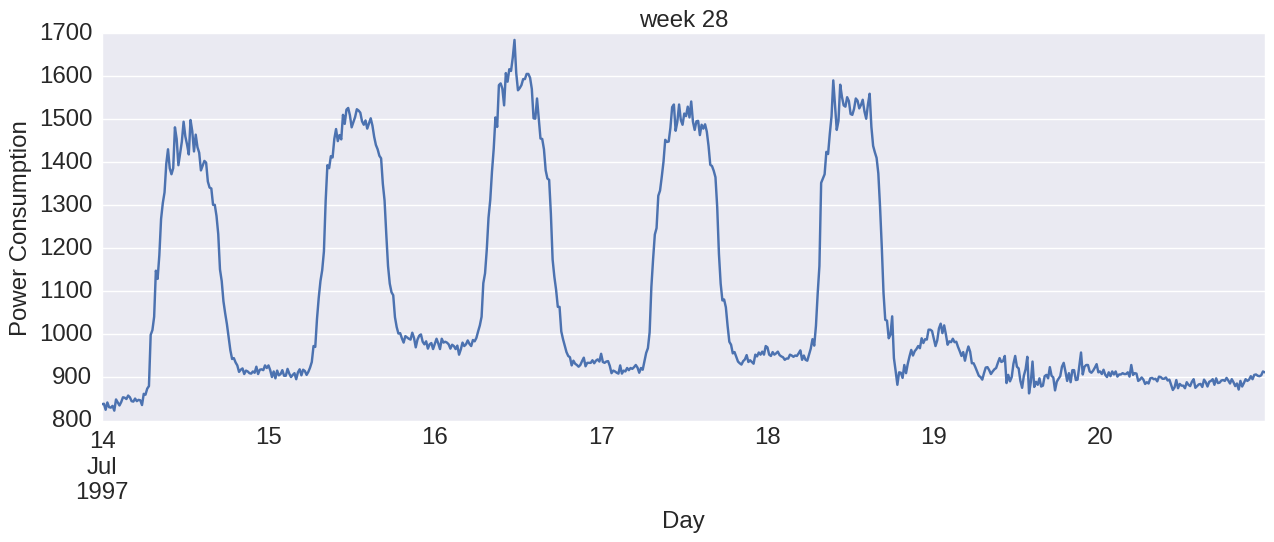

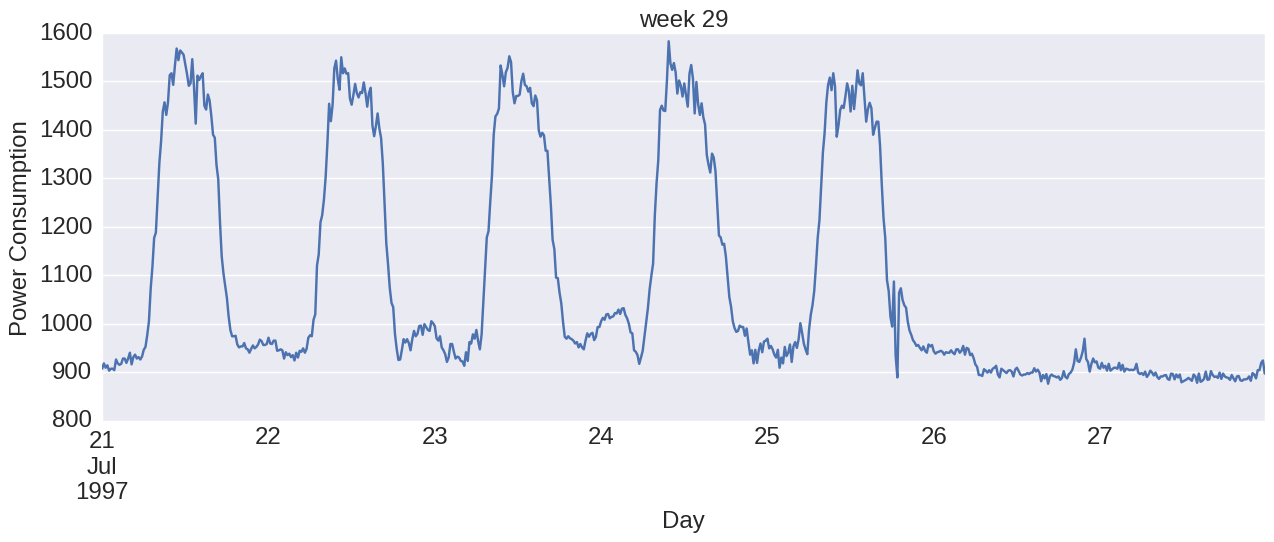

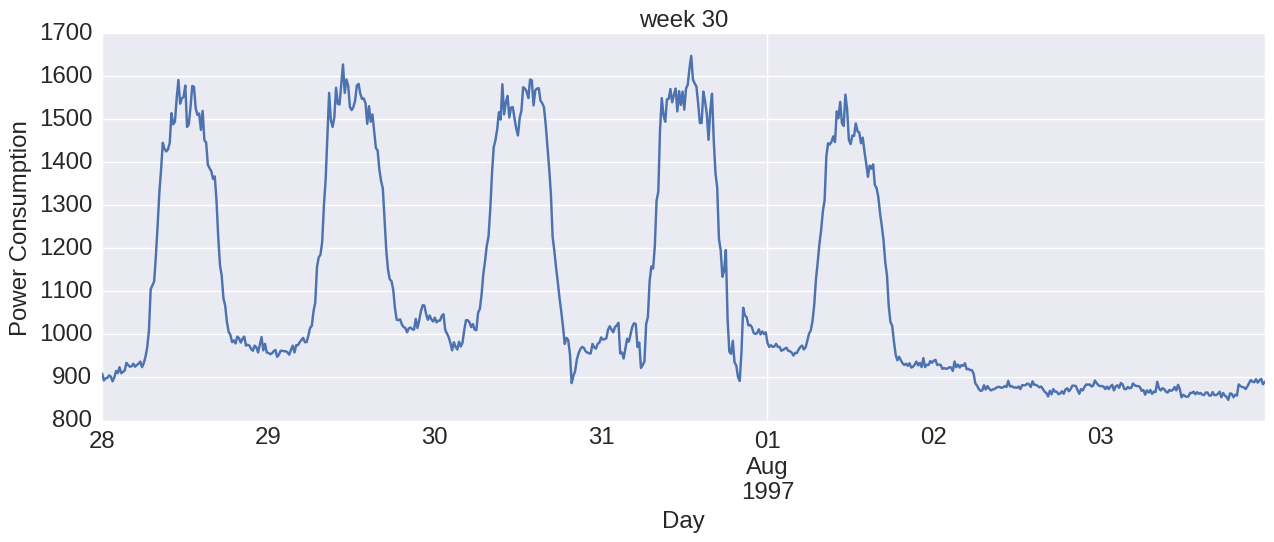

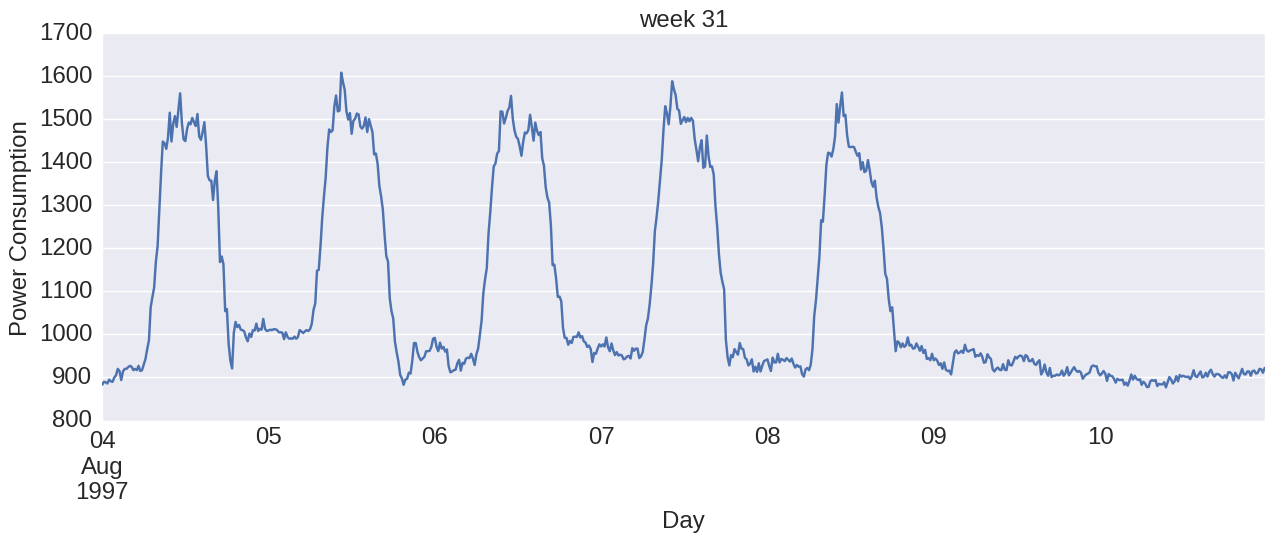

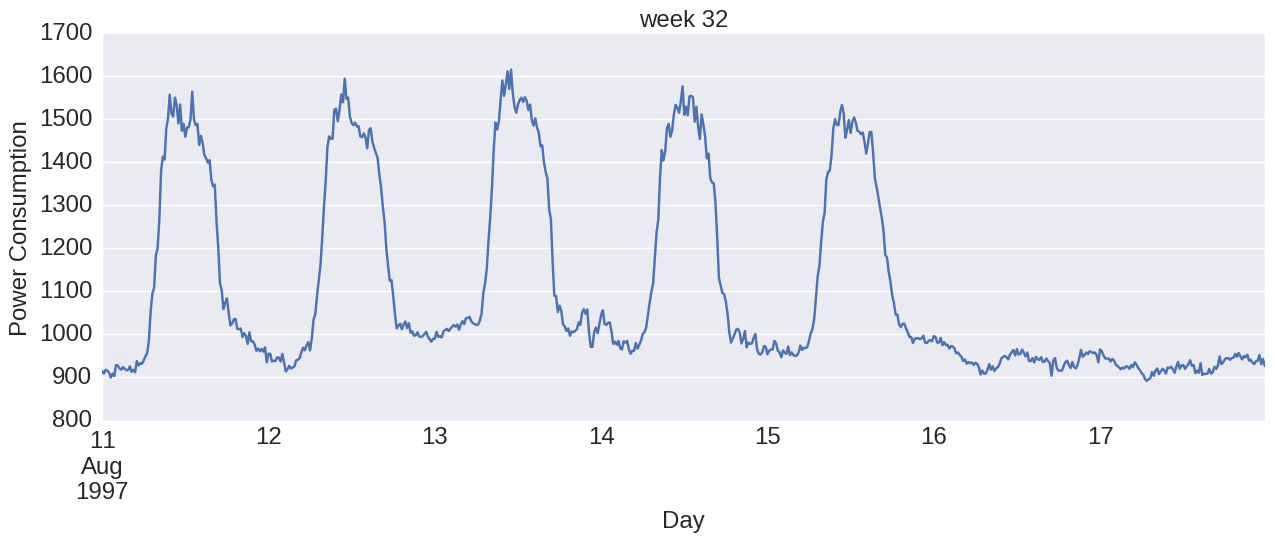

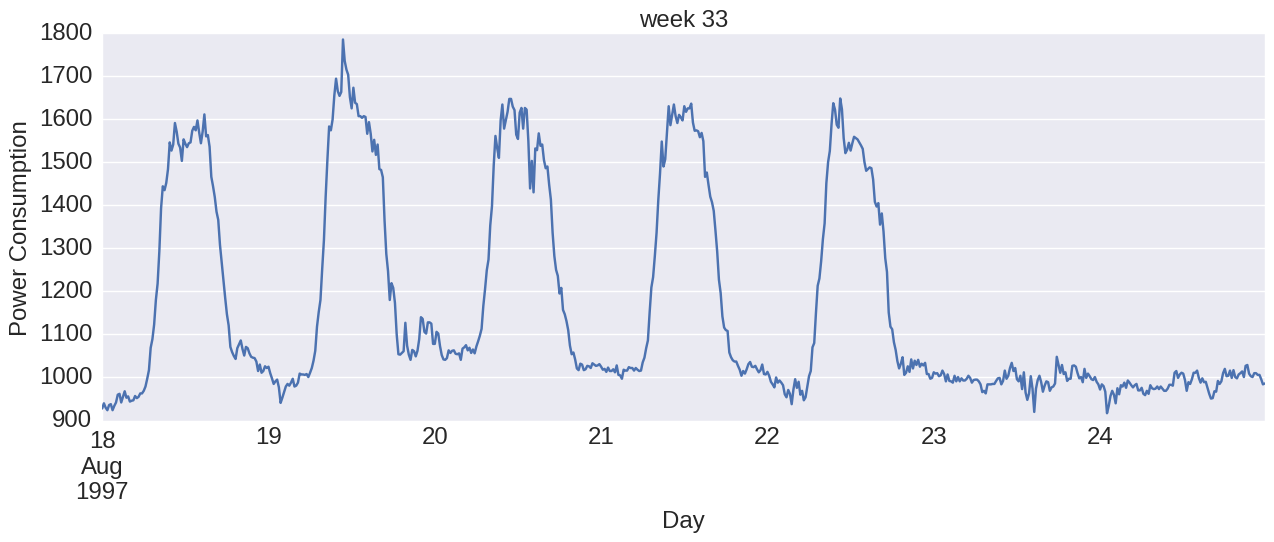

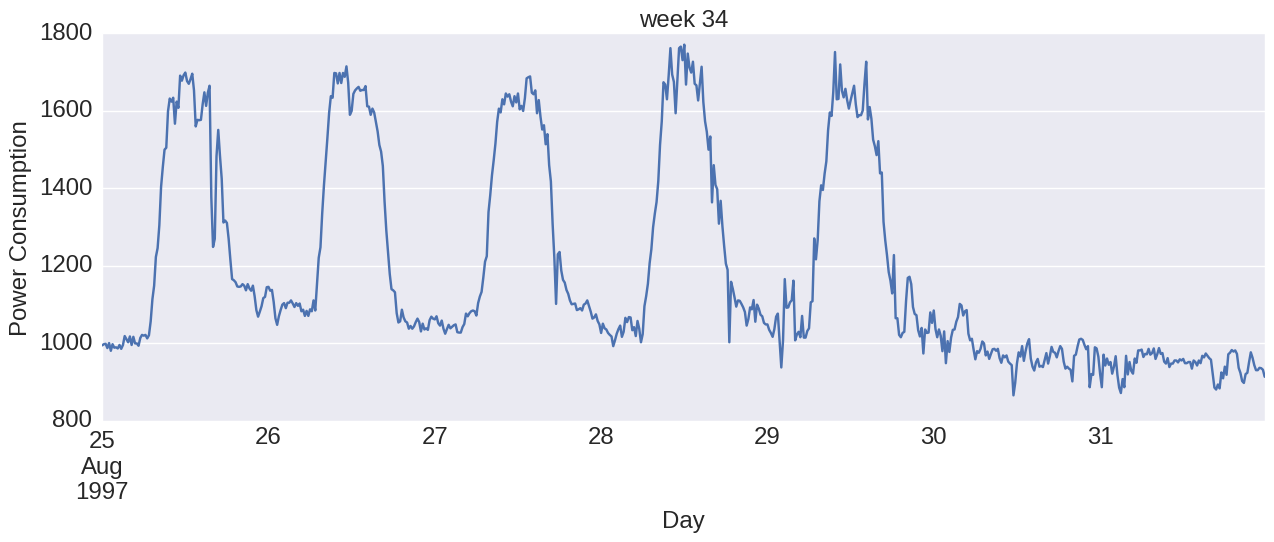

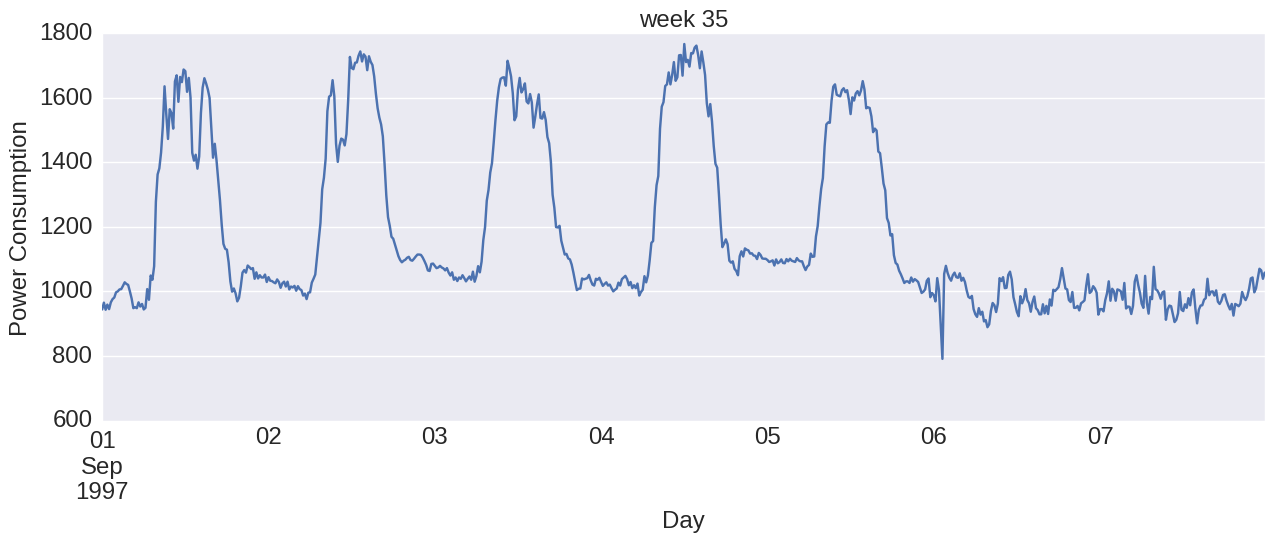

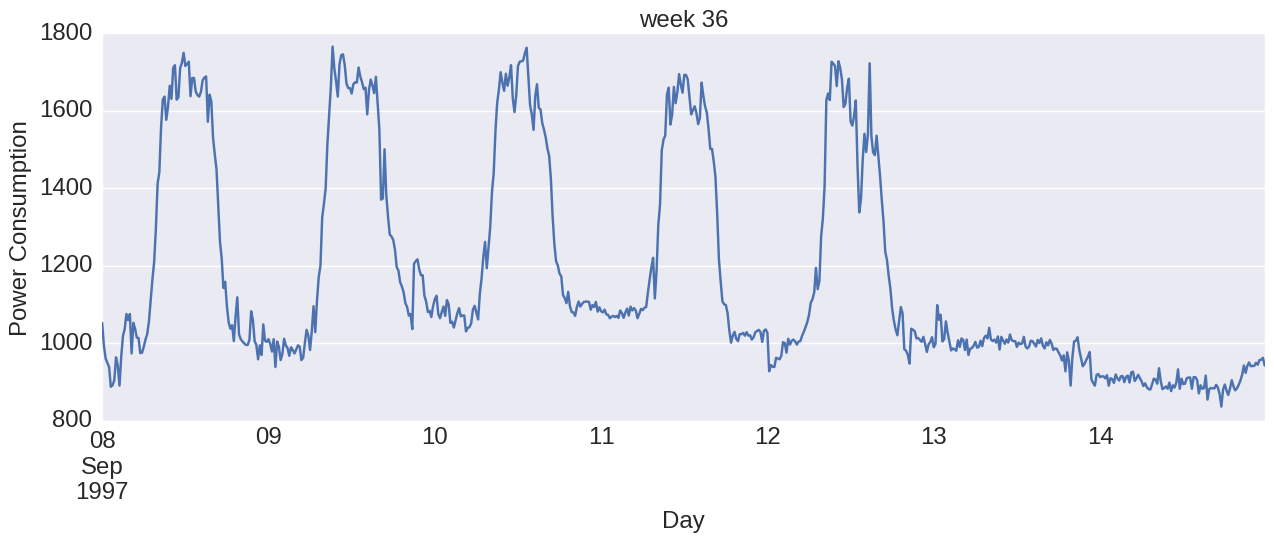

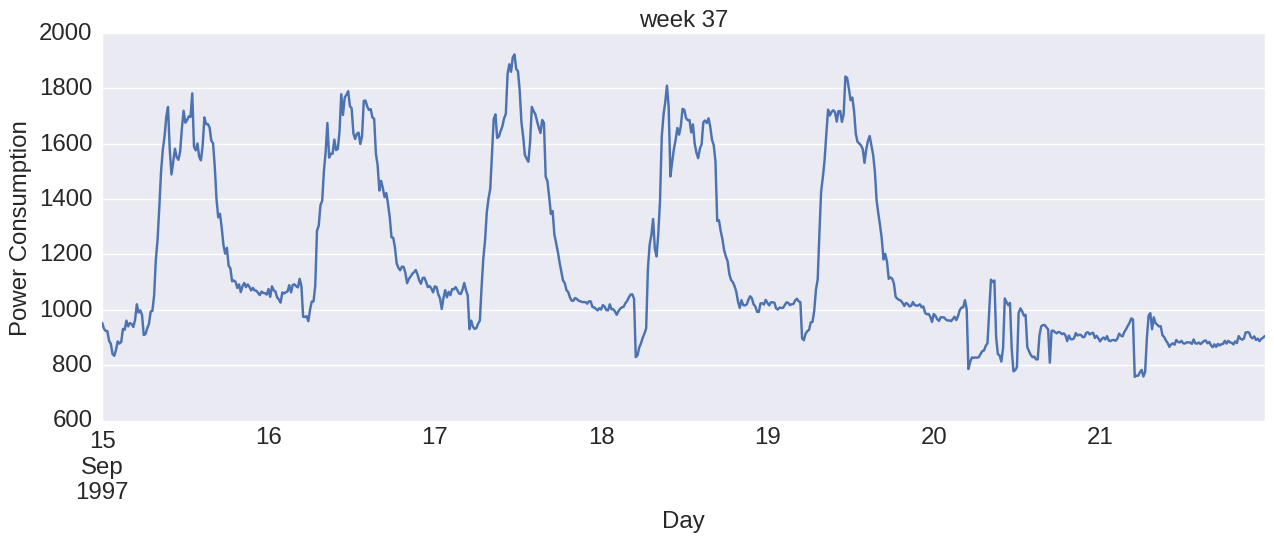

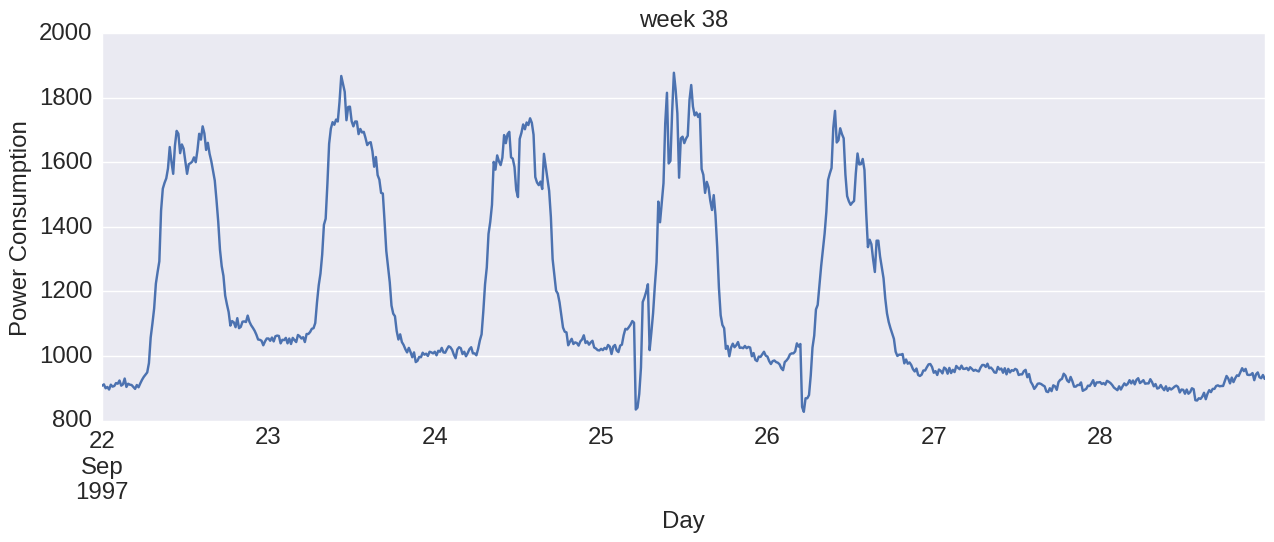

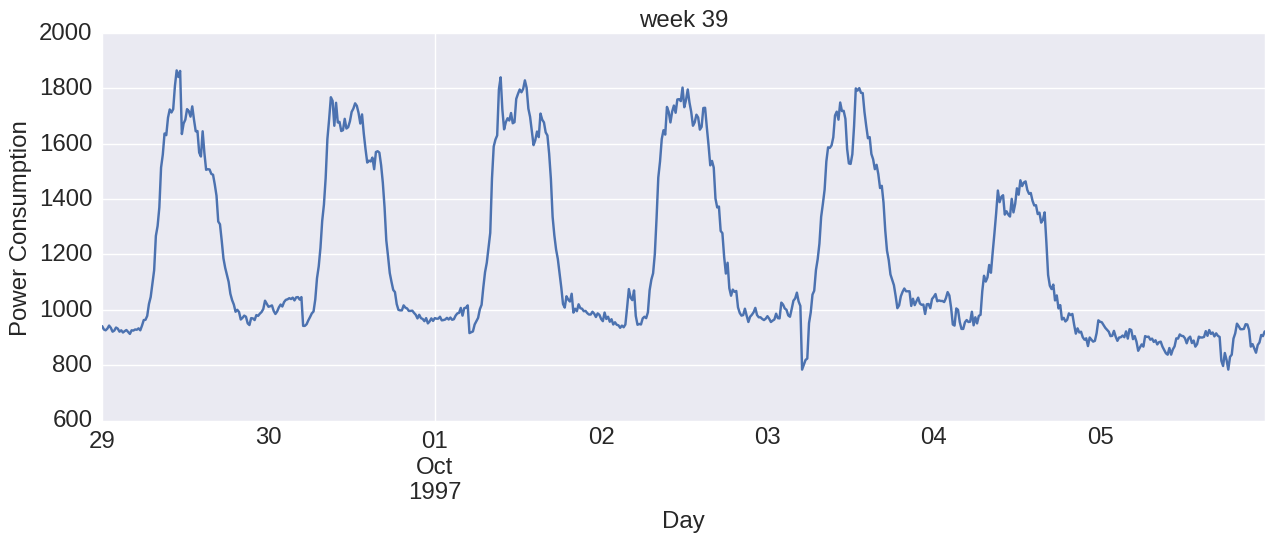

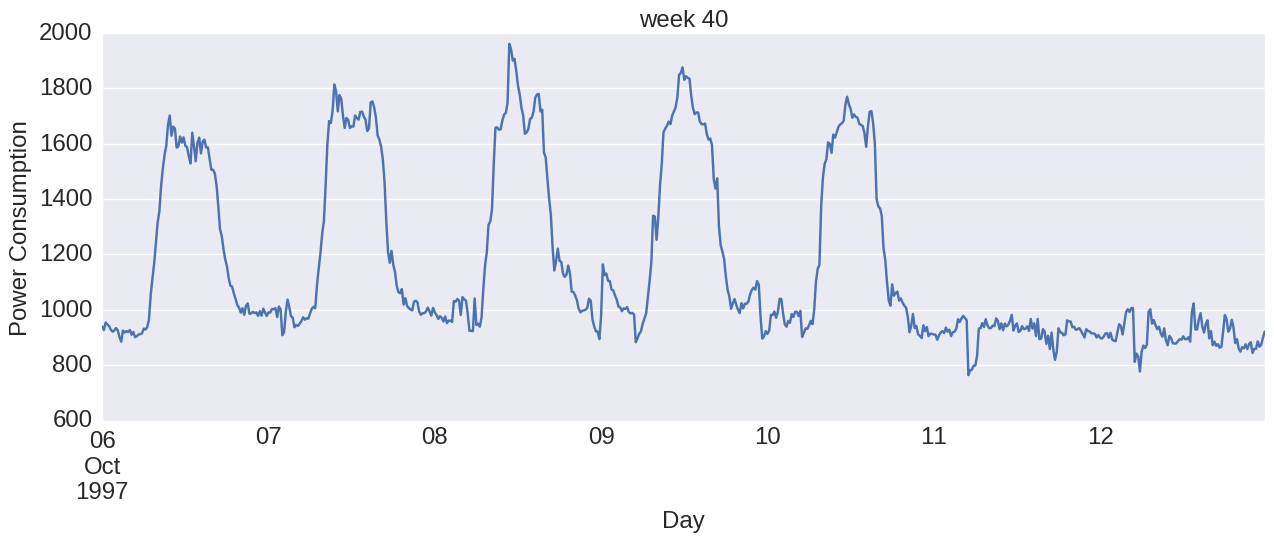

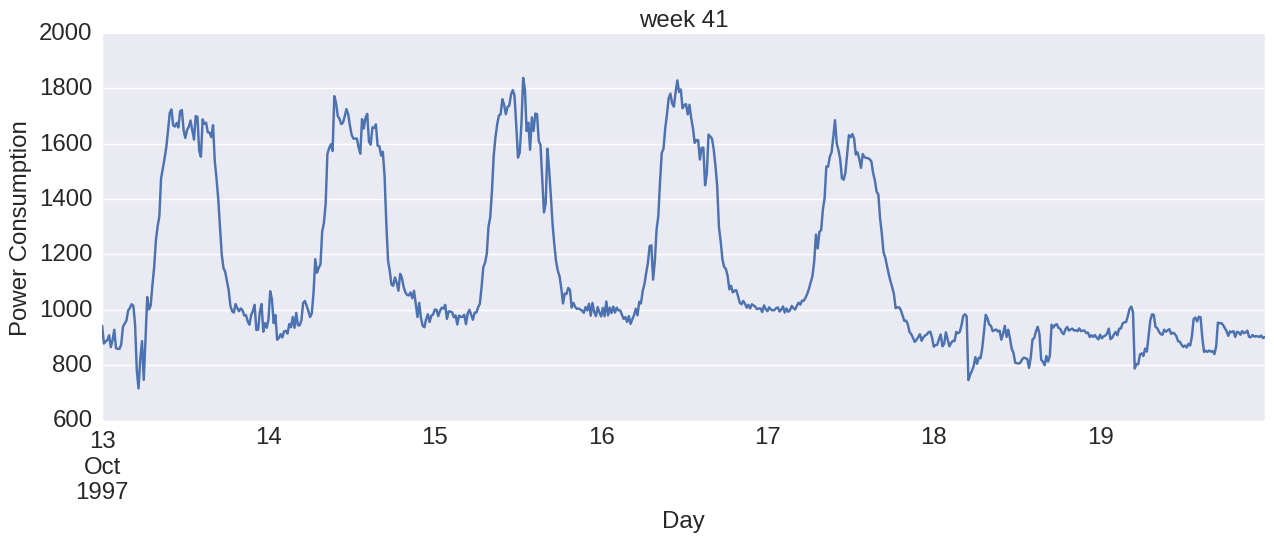

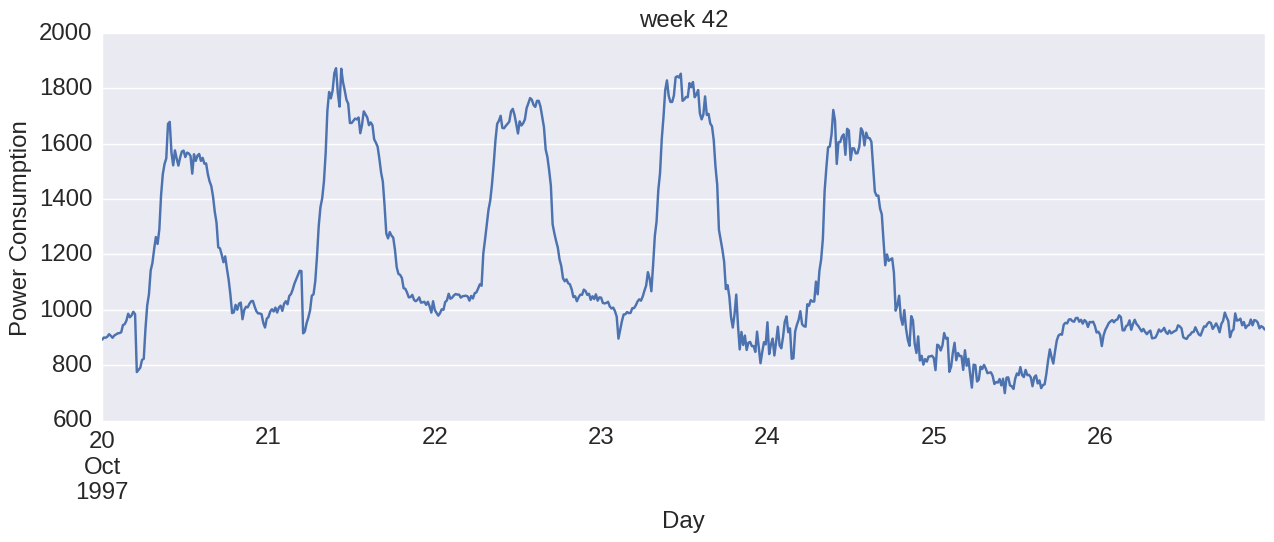

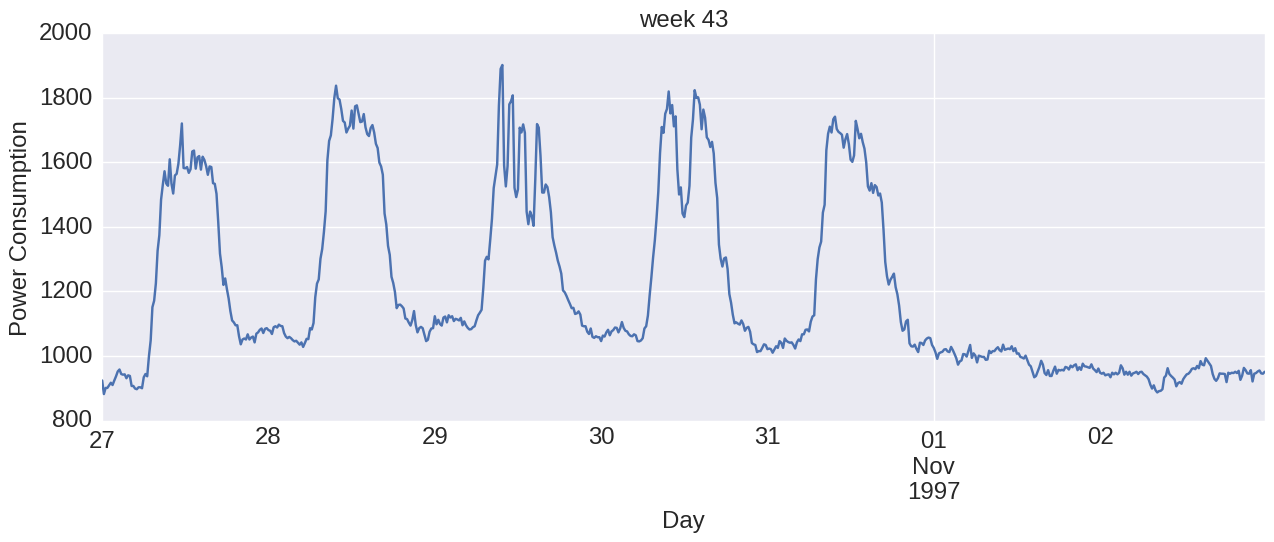

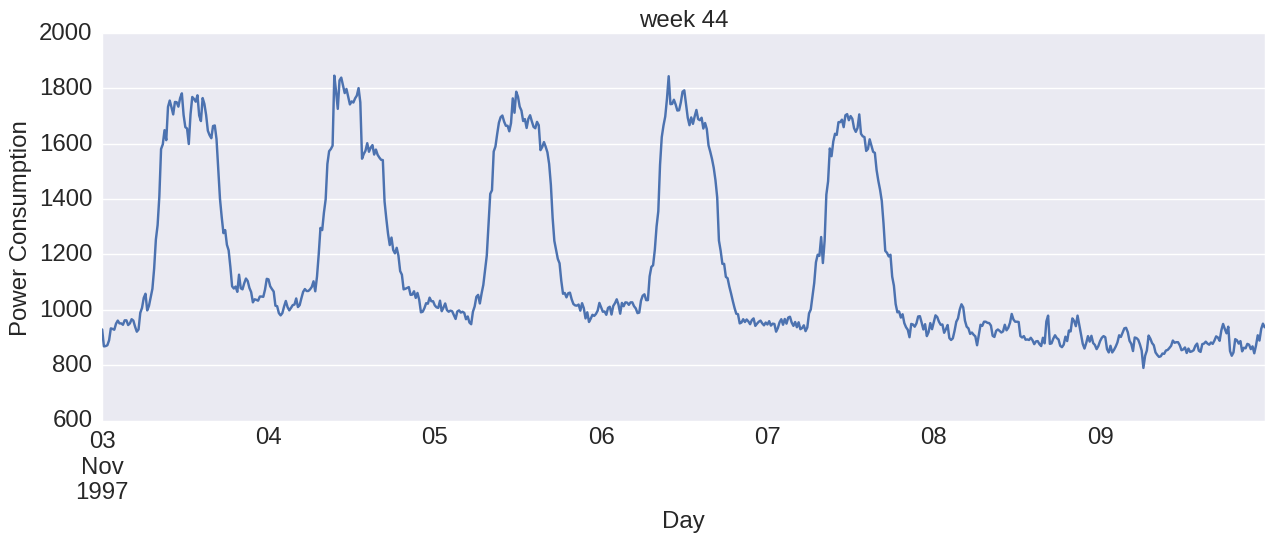

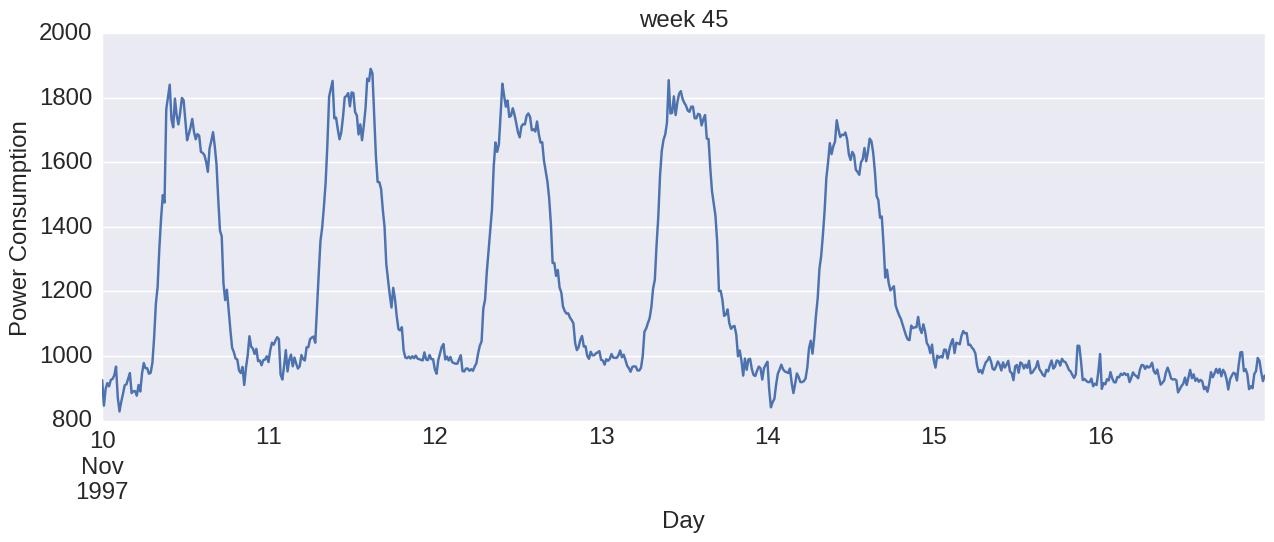

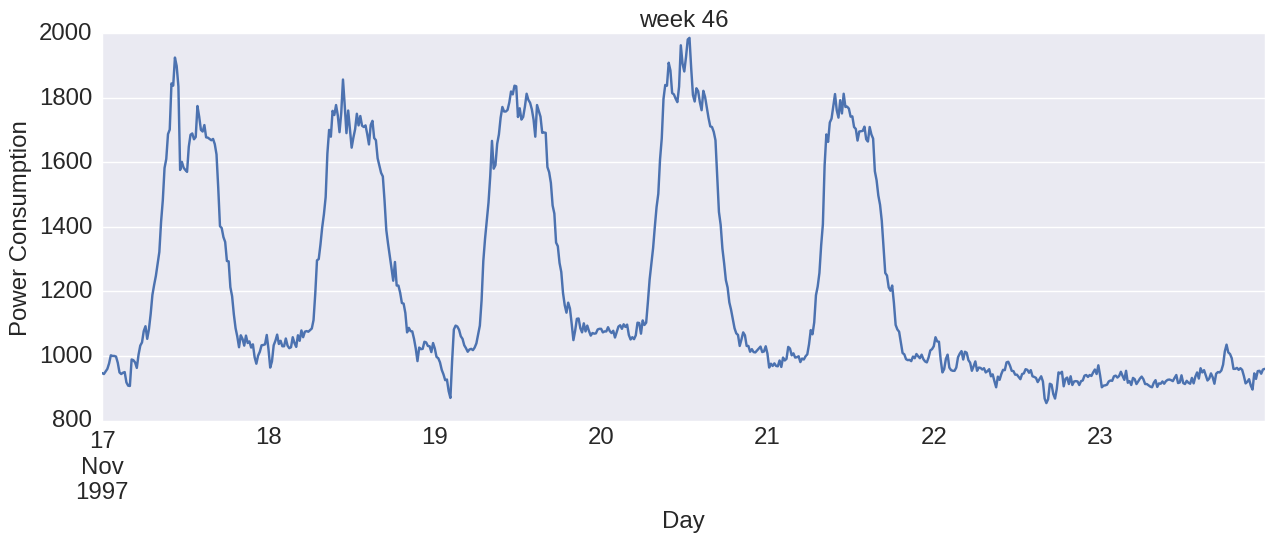

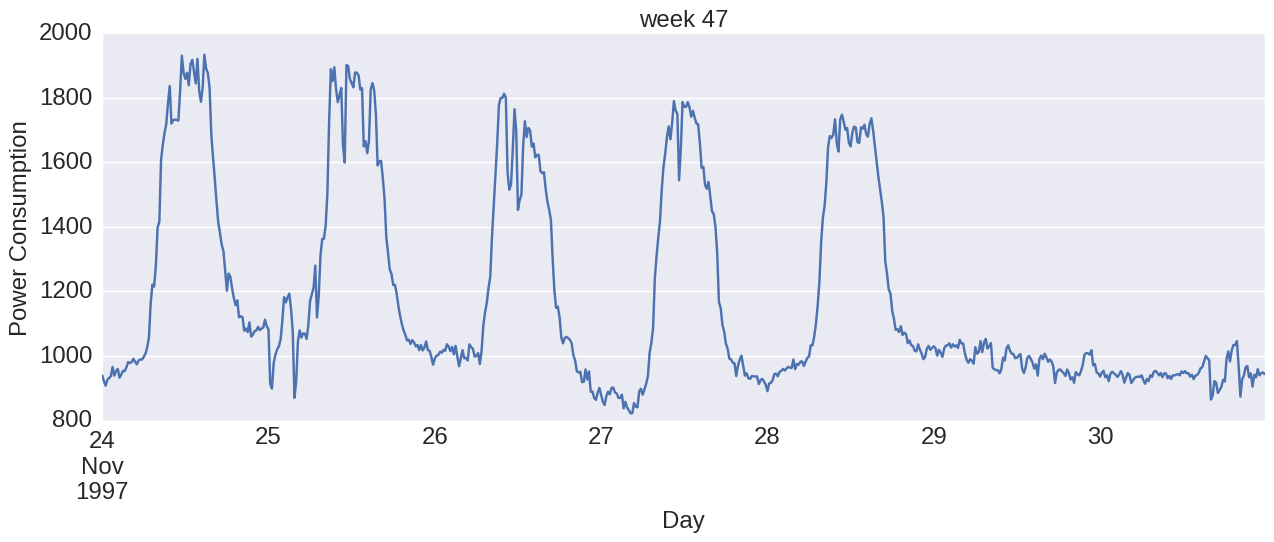

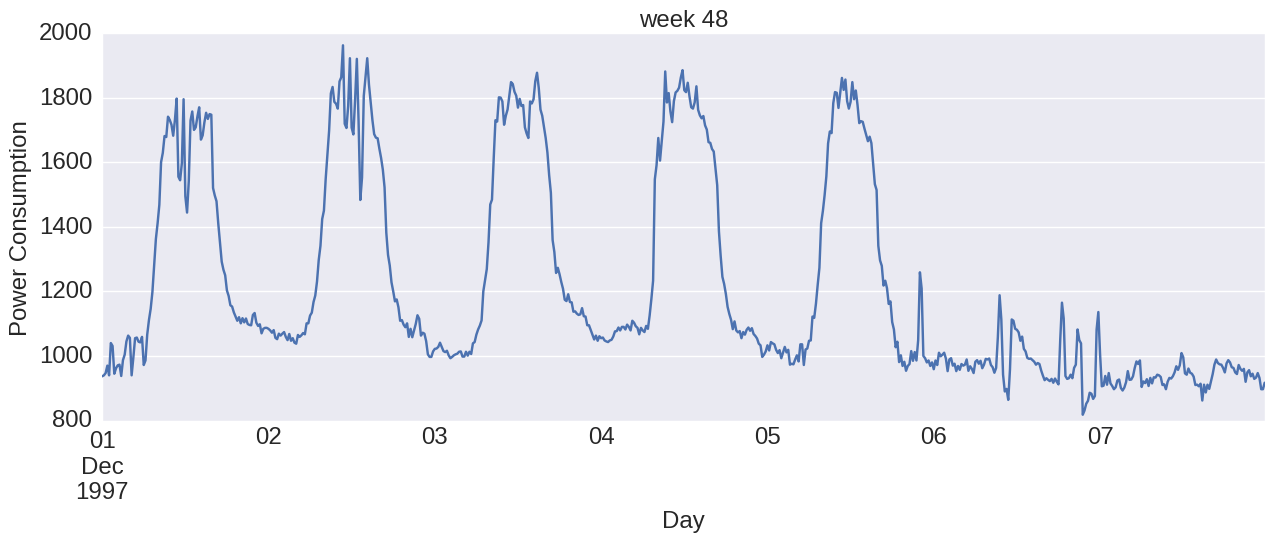

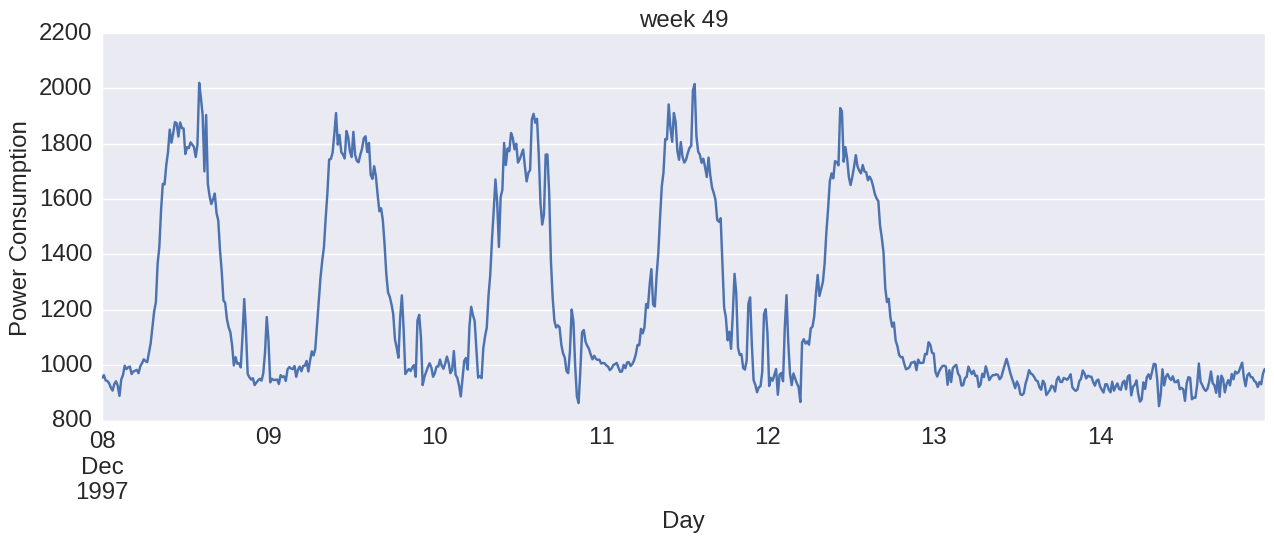

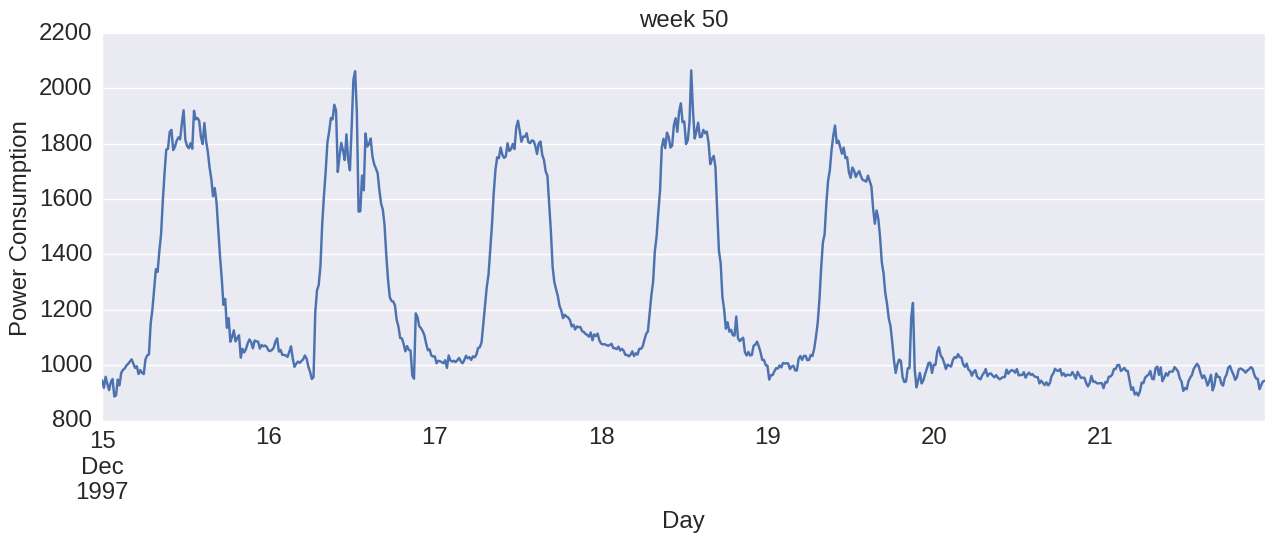

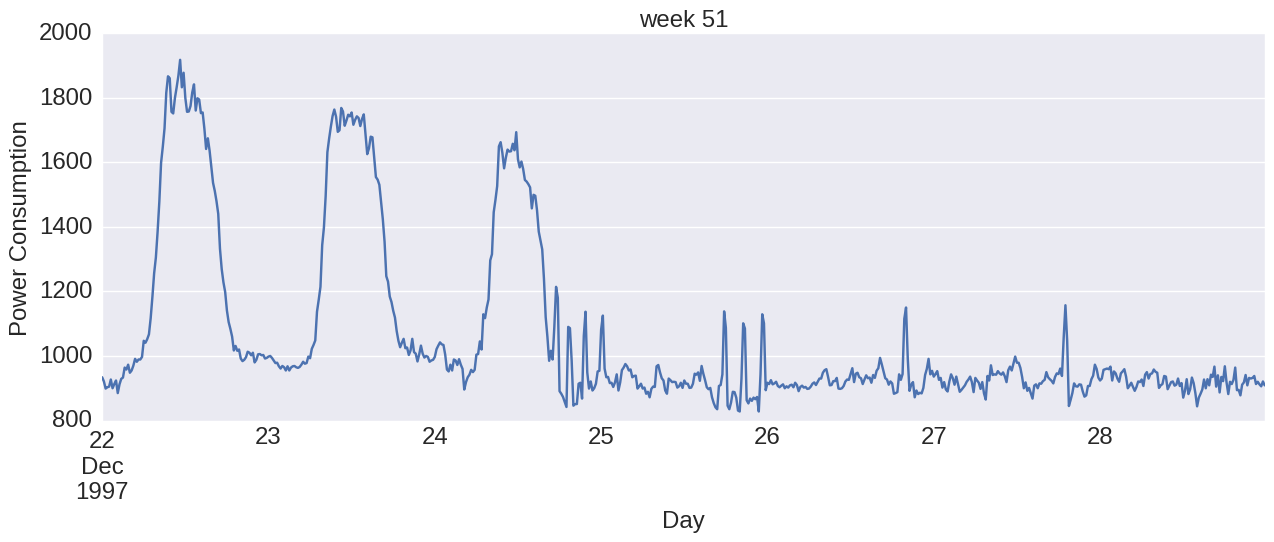

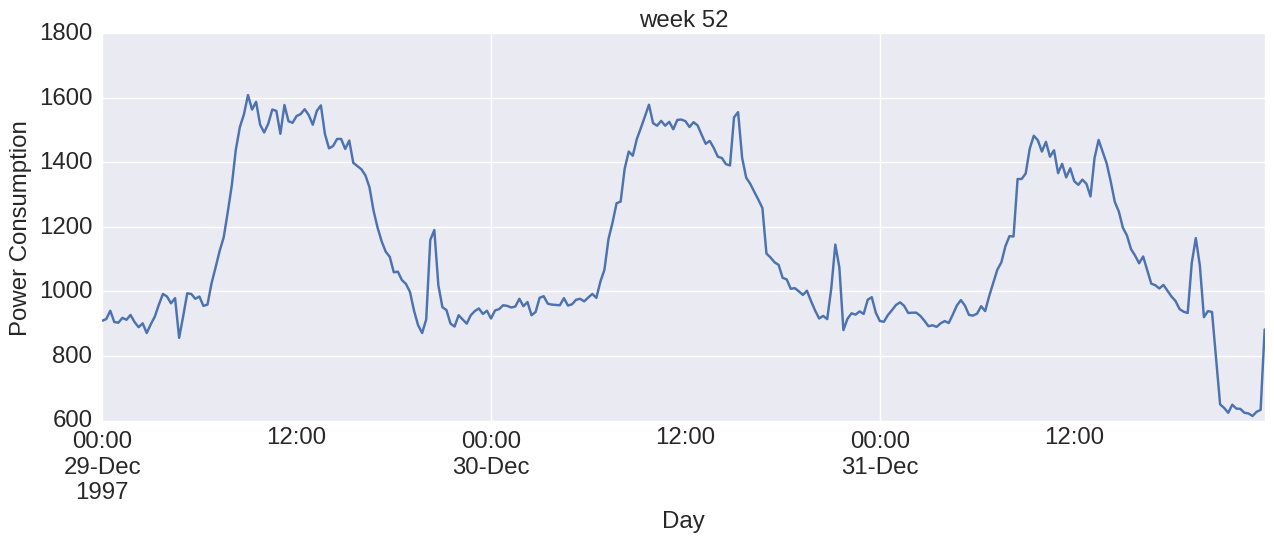

In [27]:
#iterate over a week. a week will have 672 values
step = 672

for i in range(0,df.shape[0],step):
    tmp = df[i:i+step]['consumption'].plot()
    plt.title("week %s"%(i/step +1))
    plt.xlabel('Day')
    plt.ylabel('Power Consumption')
    plt.show()
    

In [28]:
anomaly_weeks = [12,13,17,18,20,39,51,52]
validation1_weeks = [2,4,14]
validation2_weeks = [10,11,12,13,19,20,38,39]
test_weeks = [15,16,17,18,50,51,52]

df_train_list = []
df_valid1_list = []
df_valid2_list = []
df_test_list = []

for i in range(0,df.shape[0],step):
    df[i:i+step].plot(figsize=(30,10))
    week = i/step +1
    if week in validation1_weeks:
        df_valid1_list.append(df[i:i+step])  
    elif week in validation2_weeks:
        if week in anomaly_weeks:
            df[i:i+step]['anomaly'] =1
        df_valid2_list.append(df[i:i+step])
    elif week in test_weeks:
        if week in anomaly_weeks:
            df[i:i+step]['anomaly'] =1
        df_test_list.append(df[i:i+step])
    else:
        df_train_list.append(df[i:i+step])

print len(df_train_list)
print len(df_valid1_list)
print len(df_valid2_list)
print len(df_test_list)
   

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/akash/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

34
3
8
7


In [29]:
df_train = pd.concat(df_train_list)
df_test = pd.concat(df_test_list)
df_validation1 = pd.concat(df_valid1_list)
df_validation2 = pd.concat(df_valid2_list)
df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation1'] = df_validation1
df_dict['validation2'] = df_validation2

In [30]:
#df_dict['test'].head(1400)

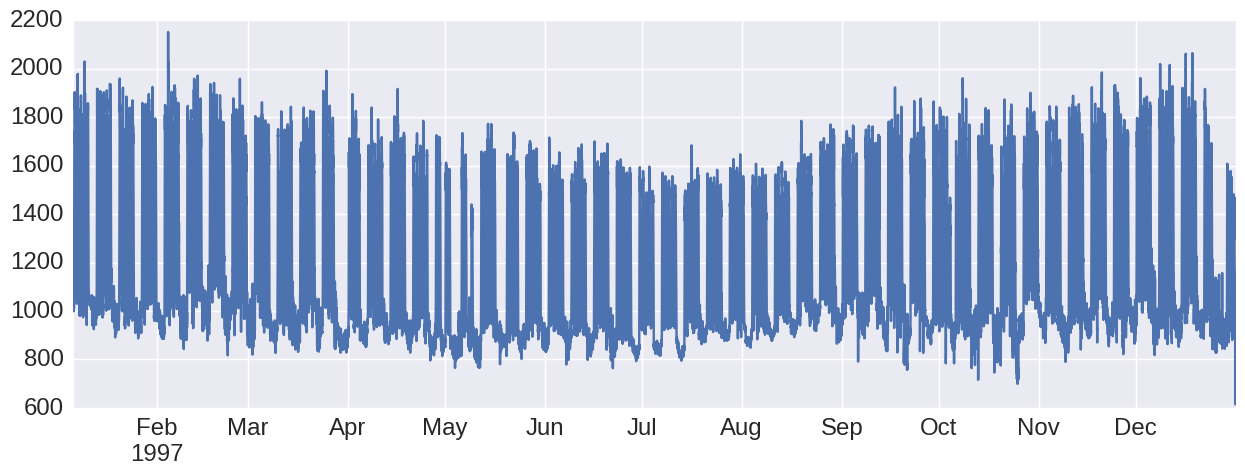

In [32]:
plt.figure()
df['consumption'].plot(figsize=(15,5))
rows = df[df.anomaly.isin([1])].itertuples()
for row in rows:
    plt.plot(row[0], row[1], 'r.', markersize=5.0)
plt.show()

Size of test: 4320
Size of validation1: 2016
Size of validation2: 5376
Size of train: 22848
Total: 34560
Ratio of test: 0.125000
Ratio of validation1: 0.058333
Ratio of validation2: 0.155556
Ratio of train: 0.661111


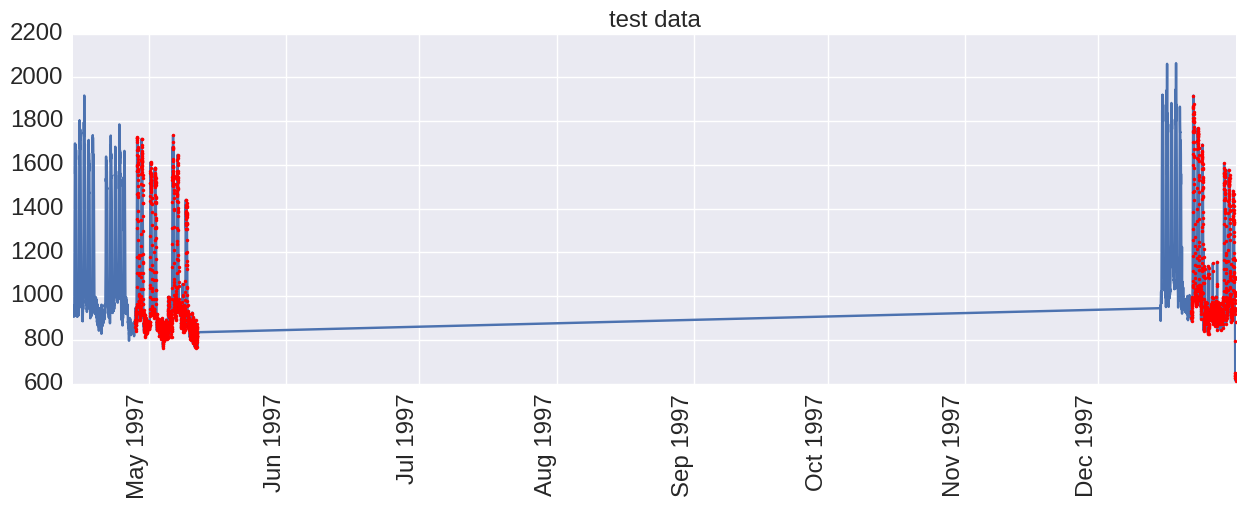

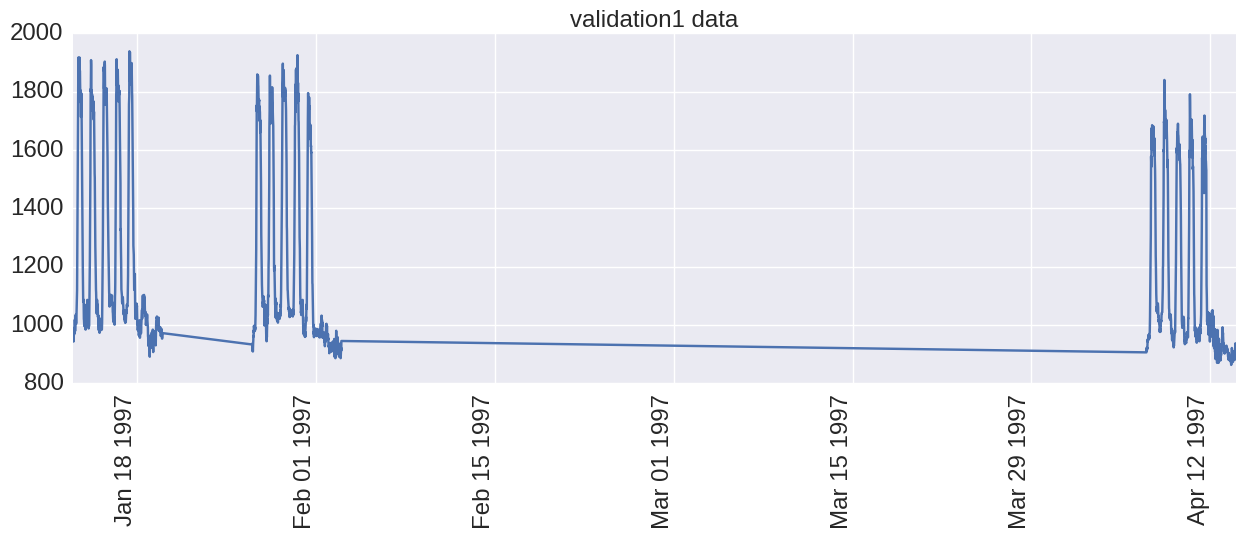

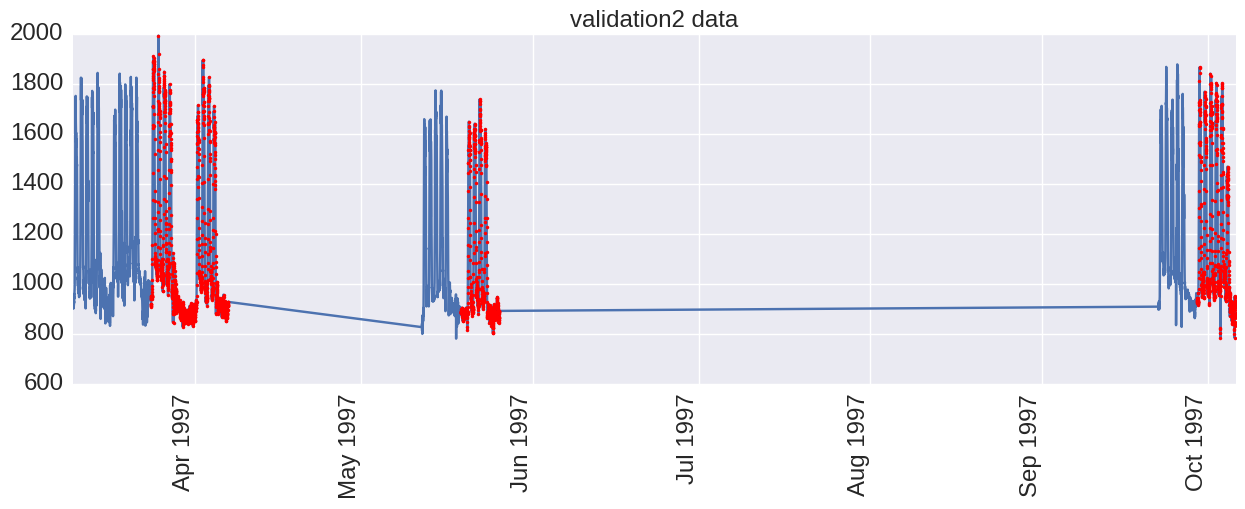

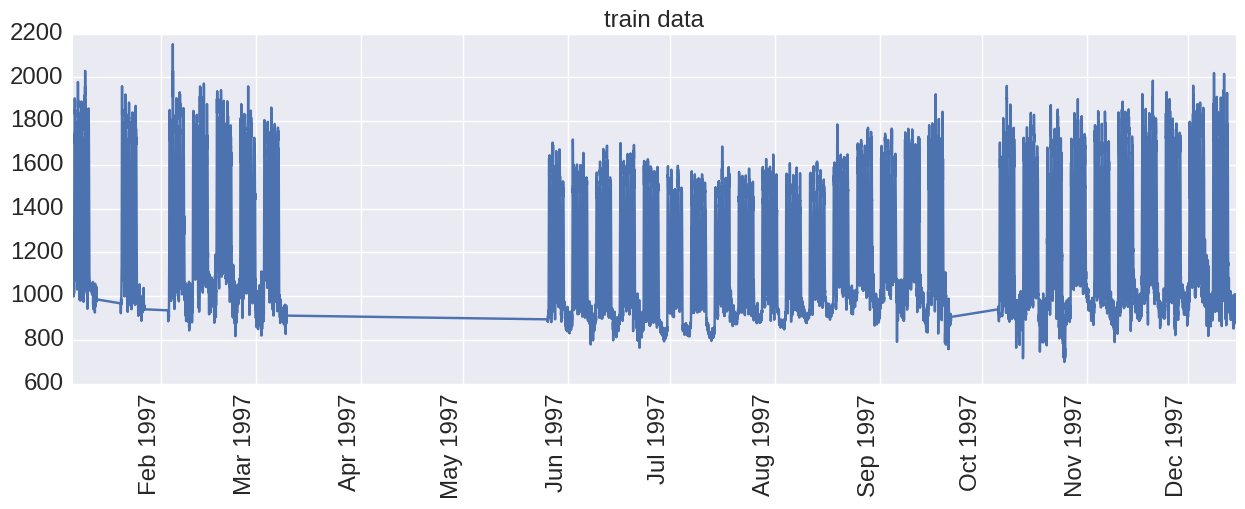

In [33]:
count = 0
for key in df_dict:
    print "Size of %s: %d"%(key,df_dict[key].shape[0])
    count += df_dict[key].shape[0]
print "Total: %d"%(count)

for key in df_dict:
    print "Ratio of %s: %f"%(key,float(df_dict[key].shape[0])/count)

for key in df_dict:
    plt.figure()
    df_tmp = df_dict[key]
    df_tmp['consumption'].plot(figsize=(15,5))
    rows = df_tmp[df_tmp.anomaly.isin([1])].itertuples()
    for row in rows:
        plt.plot(row[0], row[1], 'r.', markersize=5.0)
    plt.xticks(rotation='vertical')
    plt.title("%s data"%(key))
    plt.show()

In [34]:
for key in df_dict:
    np.save("../resources/data/discords/dutch_power/%s"%(key),df_dict[key])

In [158]:
#Detection code starts here
#Detection code starts here
#Detection code starts here
#Detection code starts here

In [2]:
data_folder = "../resources/data/discords/dutch_power/"

In [3]:
#load training data
train_predictions = np.load(data_folder+"train_predictions.npy")
train_true = np.load(data_folder+"train_true.npy")
print train_predictions.shape
print train_true.shape


(22814, 1)
(22814,)


In [4]:
#load validation2 data
validation2_predictions = np.load(data_folder+"validation2_predictions.npy")
validation2_true = np.load(data_folder+"validation2_true.npy")
validation2_labels = np.load(data_folder+"validation2_labels.npy")
print np.shape(validation2_predictions)
print np.shape(validation2_true)
print np.shape(validation2_labels)
validation2_labels = np.reshape(validation2_labels,[len(validation2_labels),np.shape(validation2_labels)[1]])
print np.shape(validation2_labels)


(5368, 1)
(5368,)
(5374, 1, 1)
(5374, 1)


In [5]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print np.shape(test_predictions)
print np.shape(test_true)
test_labels = np.reshape(test_labels,[len(test_labels),np.shape(test_labels)[1]])
print np.shape(test_labels)

(4026, 1)
(4026,)
(4318, 1)


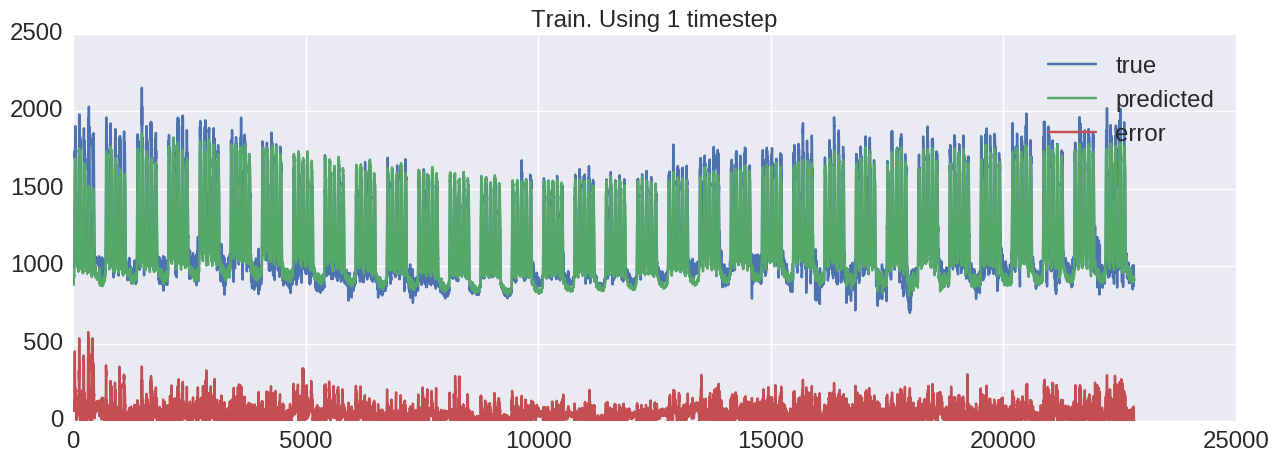

In [6]:
plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions[:,0],label='predicted')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")
plt.show()

[ 10.19925827]
5390.45006475


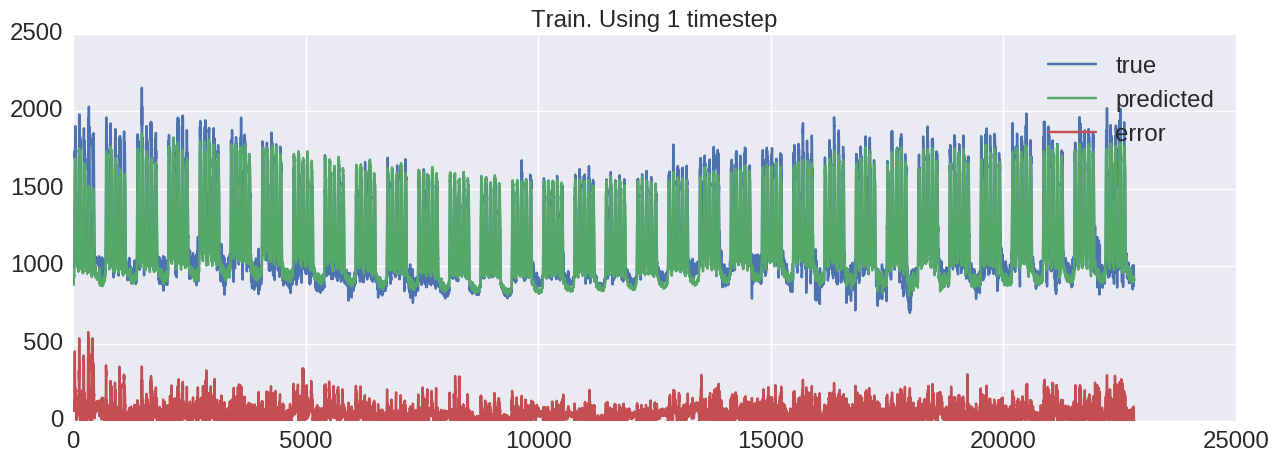

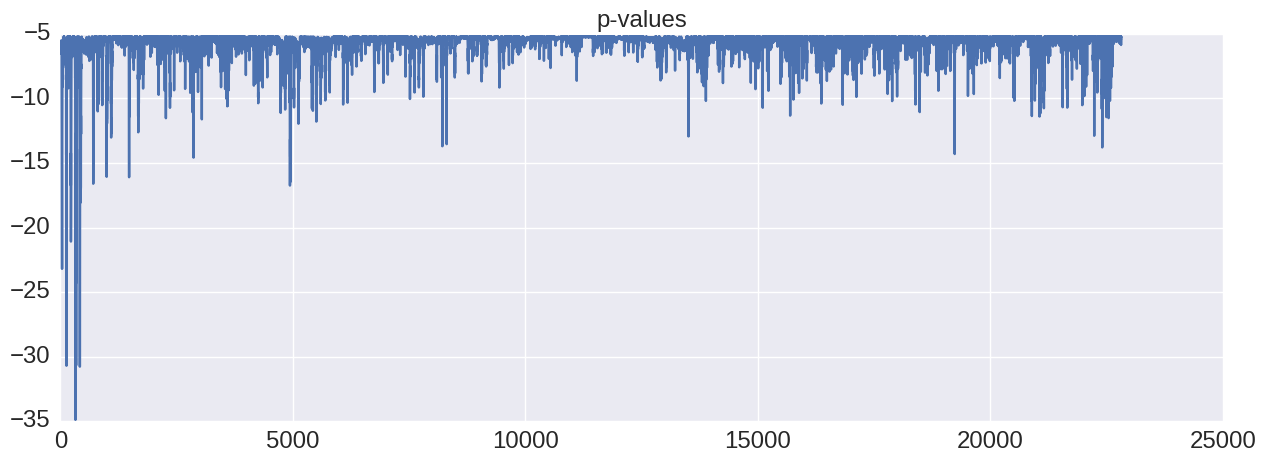

In [7]:
#error vectors
from scipy.stats import norm
from scipy.stats import multivariate_normal

train_error_vectors = np.zeros(np.shape(train_predictions))
n_cols = np.shape(train_predictions)[1]
for i in range(n_cols):
    train_error_vectors[:,i] =  train_true -train_predictions[:,i]

mean = np.mean(train_error_vectors, axis=0)
cov = np.cov(train_error_vectors,rowvar=False)
print mean
print cov
p_values= multivariate_normal.logpdf(train_error_vectors,mean,cov)

plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions[:,0],label='predicted')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.title("Train. Using 1 timestep")
plt.legend()

# plt.figure(figsize=(15,5))
# plt.plot(train_true,label='true')
# plt.plot(train_predictions[:,5],label='predicted')
# plt.plot(abs(train_true - train_predictions[:,5]),label='error')
# plt.title("Train. Using 6 timestep")
# plt.legend()

plt.figure(figsize=(15,5))
plt.plot(p_values)
plt.title("p-values")
plt.show()

train_errors_1 = train_true - train_predictions[:,0]

In [8]:
v2_error_vectors = np.zeros(np.shape(validation2_predictions))
for i in range(n_cols):
    v2_error_vectors[:,i] =  validation2_true -validation2_predictions[:,i]
v2_p_values= multivariate_normal.logpdf( v2_error_vectors,mean,cov)
# v2_true_anomalies = np.where(validation2_labels[:,0]==1)
# print "Validation2. Number True Anomalies: %d"%(np.shape(v2_true_anomalies)[1])
# print "Validation2. Location of anomalies: %s"%(v2_true_anomalies)
# print "validation2. True anomalies: %s"%(validation2_true[v2_true_anomalies])
# v2_thresholds =v2_p_values[v2_true_anomalies]
# print "validation2. p-values at true anomalies: %s"%(v2_thresholds)

print 
test_error_vectors = np.zeros(np.shape(test_predictions))
for i in range(n_cols):
    test_error_vectors[:,i] =  test_true -test_predictions[:,i]
test_p_values= multivariate_normal.logpdf( test_error_vectors,mean,cov)
test_true_anomalies = np.where(test_labels[:,0]==1)
# print "Test. Number True Anomalies in: %d"%(np.shape(test_true_anomalies)[1])
# print "Test. Location of anomalies: %s"%(test_true_anomalies)
# print "Test. True anomalies: %s"%(test_true[test_true_anomalies])
# test_thresholds = test_p_values[test_true_anomalies]
# print "Test. p-values at true anomalies: %s"%(test_thresholds)




In [9]:
 print pylab.rcParams.keys()

[u'agg.path.chunksize', u'animation.avconv_args', u'animation.avconv_path', u'animation.bitrate', u'animation.codec', u'animation.convert_args', u'animation.convert_path', u'animation.ffmpeg_args', u'animation.ffmpeg_path', u'animation.frame_format', u'animation.html', u'animation.mencoder_args', u'animation.mencoder_path', u'animation.writer', u'axes.axisbelow', u'axes.edgecolor', u'axes.facecolor', u'axes.formatter.limits', u'axes.formatter.use_locale', u'axes.formatter.use_mathtext', u'axes.formatter.useoffset', u'axes.grid', u'axes.grid.axis', u'axes.grid.which', u'axes.hold', u'axes.labelcolor', u'axes.labelpad', u'axes.labelsize', u'axes.labelweight', u'axes.linewidth', u'axes.prop_cycle', u'axes.spines.bottom', u'axes.spines.left', u'axes.spines.right', u'axes.spines.top', u'axes.titlesize', u'axes.titleweight', u'axes.unicode_minus', u'axes.xmargin', u'axes.ymargin', u'axes3d.grid', u'backend', u'backend.qt4', u'backend.qt5', u'backend_fallback', u'boxplot.bootstrap', u'boxplot

In [10]:
params = {'legend.fontsize': 'large',
          #'figure.figsize': (15,5),
          #'axes.grid' :True,
          #'grid.color' :'White',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'lines.linewidth':1}
pylab.rcParams.update(params)
sns.set_style("whitegrid")
#sns.set_palette('Set1')

In [11]:
# #plot v2 predictions
# plt.figure()
# plt.plot(validation2_true,label='True Value',color=sns.xkcd_rgb["denim blue"])
# plt.plot(validation2_predictions[:,0],ls ='dashed',label='Predicted Value',color=sns.xkcd_rgb["medium green"])
# plt.plot(abs(validation2_true - validation2_predictions[:,0]),label='Error',color=sns.xkcd_rgb["pale red"])
# #for row in v2_true_anomalies:
# #    plt.plot(row, validation2_true[row], 'r.', markersize=20.0)
# plt.legend(bbox_to_anchor=(1,.37),borderaxespad=0.)
# plt.xlabel("Time step")
# plt.ylabel("Power Consumption")
# #plt.title("Validation2. Using 1 timestep")
# plt.show()

# #plot v2 log PD
# plt.figure()
# plt.plot(v2_p_values,label='Log PD',color=sns.xkcd_rgb["dark teal"])
# plt.axhline(y=threshold_v2,ls='dashed',label='Threshold',color=sns.xkcd_rgb["dark teal"])
# plt.legend(bbox_to_anchor=(1, .45), borderaxespad=0.)
# plt.xlabel("Time step")
# plt.ylabel("Log PD")
# #plt.title("Validation2 p-values")
# plt.show()


In [12]:
#set v2 Threshold
print sorted(v2_p_values)[:50]
print sorted(test_p_values)[:50]
threshold_v2 = -24
print len(validation2_true)

[-46.871888374903385, -46.053353295266788, -45.822234372200995, -45.743534198641711, -45.655280266572355, -45.059117567031365, -44.690954061210078, -44.457998471698879, -44.438042311511218, -44.10271657685314, -43.902928747181811, -43.727363642619146, -43.087156606749751, -42.336557289183048, -42.320098542849848, -42.225384953260928, -41.867838401916771, -41.802982776898205, -41.696504148343926, -41.6531016888393, -40.51063840174983, -40.332825166263767, -40.299795442708522, -40.275593732061154, -40.165454882868652, -40.100637976522613, -36.988866420209717, -36.304654888554282, -34.968820513111879, -33.872616902446211, -33.394761176608704, -33.295704765053493, -33.181986228820982, -32.948281888786546, -32.936593937837621, -31.781887346904242, -31.674702457430008, -31.298049144575323, -31.134449799194059, -30.679821678430756, -30.593491256039968, -30.194371731134268, -30.078903617376838, -30.055237392085488, -29.669412092771672, -29.500326173830466, -29.38037199958233, -29.1186907712069

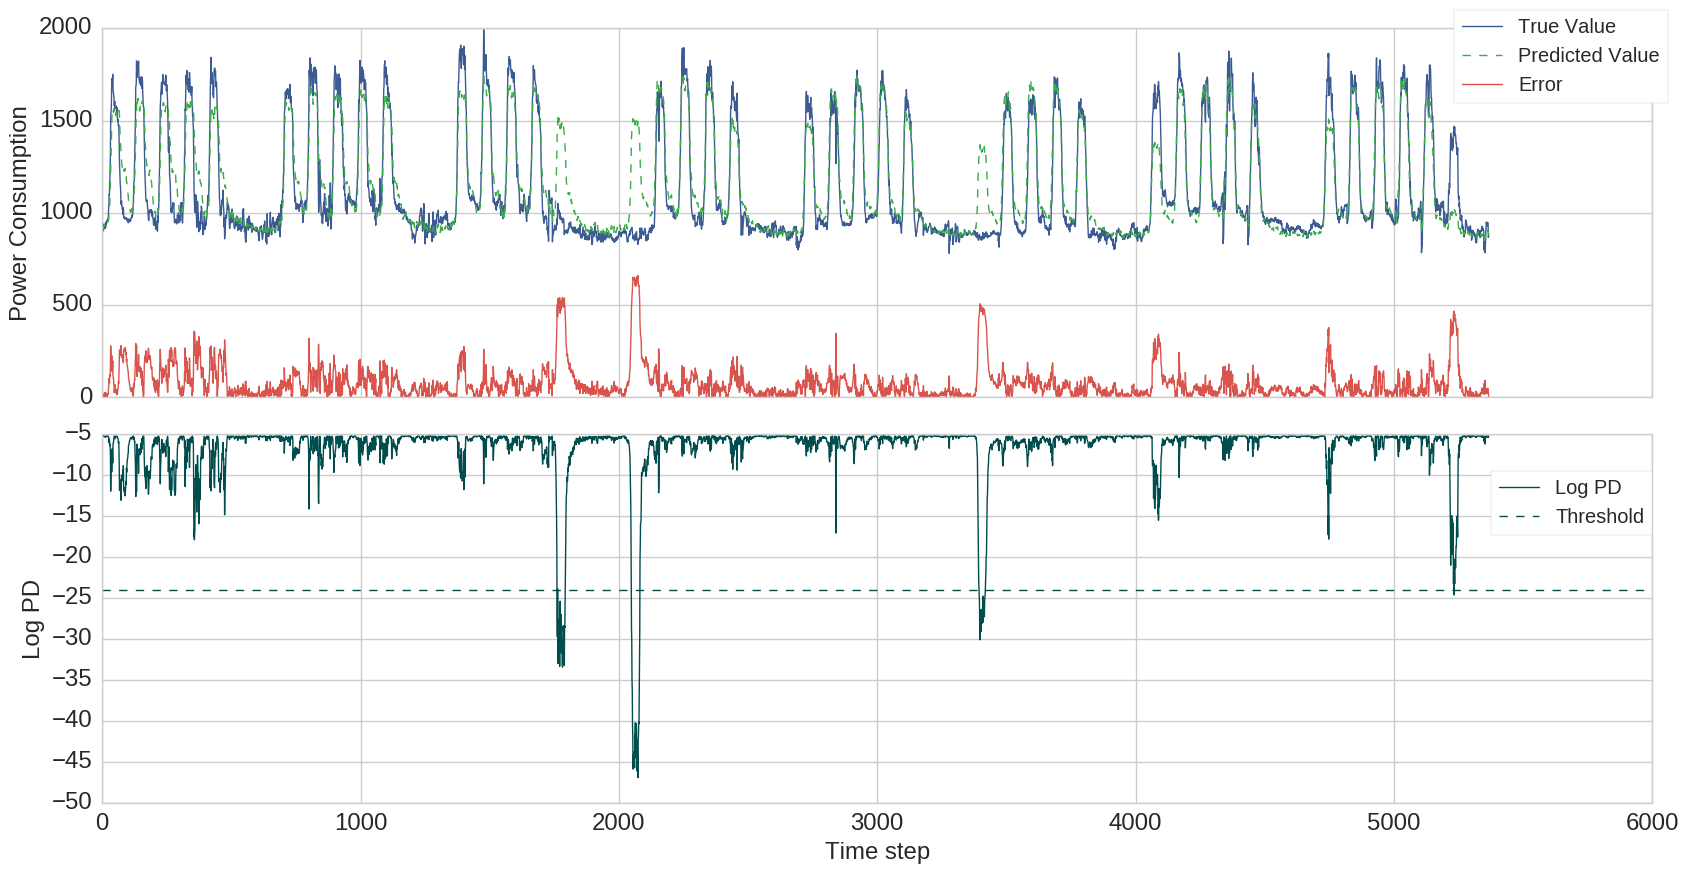

In [15]:
f = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.1)


ax1 = plt.subplot(211)
ax1.plot(validation2_true,label='True Value',color=sns.xkcd_rgb["denim blue"])
ax1.plot(validation2_predictions[:,0],ls ='dashed',label='Predicted Value',color=sns.xkcd_rgb["medium green"])
ax1.plot(abs(validation2_true - validation2_predictions[:,0]),label='Error',color=sns.xkcd_rgb["pale red"])
#for row in v2_true_anomalies:
#    plt.plot(row, validation2_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1.01,1.05),borderaxespad=0.,frameon=True)
plt.ylabel("Power Consumption")
#plt.title("Validation2. Using 1 timestep")


#plot v2 log PD
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(v2_p_values,label='Log PD',color=sns.xkcd_rgb["dark teal"])
ax2.axhline(y=threshold_v2,ls='dashed',label='Threshold',color=sns.xkcd_rgb["dark teal"])
ax2.legend(bbox_to_anchor=(1, .9), borderaxespad=0.,frameon=True)
plt.ylabel("Log PD")
#plt.title("Validation2 p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("Time step")
plt.show()
pp = PdfPages('power_test.pdf')
pp.savefig(f)
pp.close()

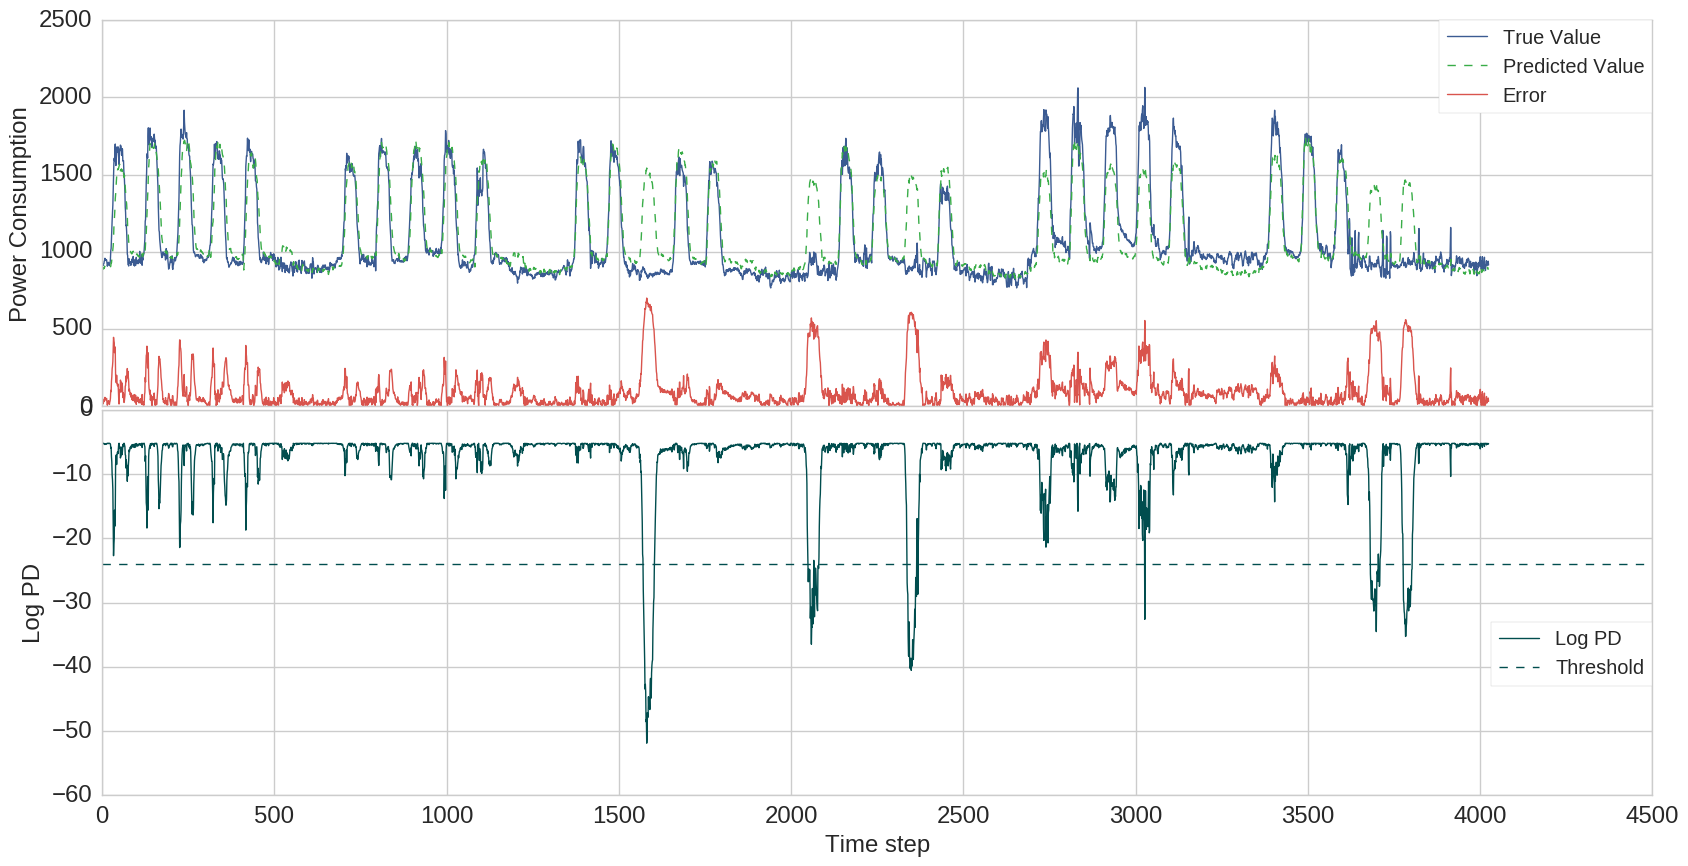

In [325]:
#plot test data
f = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.01)

ax1 = plt.subplot(211)
ax1.plot(test_true,label='True Value',color=sns.xkcd_rgb["denim blue"])
ax1.plot(test_predictions[:,0],ls ='dashed',label='Predicted Value',color=sns.xkcd_rgb["medium green"])
ax1.plot(abs(test_true - test_predictions[:,0]),label='Error',color=sns.xkcd_rgb["pale red"])
#for row in test_true_anomalies:
#    plt.plot(row, test_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1, 1), borderaxespad=0.,frameon=True)
plt.ylabel("Power Consumption")
#plt.title("Test. Using 1 timestep")

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(test_p_values,label='Log PD',color=sns.xkcd_rgb["dark teal"])
ax2.axhline(y=threshold_v2,ls='dashed',label='Threshold',color=sns.xkcd_rgb["dark teal"])
ax2.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("Log PD")
#plt.title("test p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("Time step")
plt.show()


In [322]:
#thresholds = np.append(v2_thresholds,test_thresholds)

#thresholds =v2_thresholds
thresholds =[-100]
print
print "Candidate Thresholds: %s"%(thresholds)


for i in thresholds:
    theta= i
    test_potential_anomalies = np.where(test_p_values <= theta)
    v2_potential_anomalies = np.where(v2_p_values <= theta)
    plt.figure(figsize=(15,5))
    plt.plot(validation2_true,label='true')
    plt.plot(validation2_predictions[:,0],label='predicted')
    plt.plot(abs(validation2_true - validation2_predictions[:,0]),label='error')
    for row in v2_true_anomalies:
        plt.plot(row, validation2_true[row], 'r.', markersize=20.0)
    for row in v2_potential_anomalies:
        plt.plot(row, validation2_true[row], 'k.', markersize=20.0)
    plt.legend()
    plt.title("Theta %s. Validation2. Using 1 timestep"%(i))
    plt.show()

    plt.figure(figsize=(15,5))
    plt.plot(test_true,label='true')
    plt.plot(test_predictions[:,0],label='predicted')
    plt.plot(abs(test_true - test_predictions[:,0]),label='error')
    for row in test_true_anomalies:
        plt.plot(row, test_true[row], 'r.', markersize=20.0)
    for row in test_potential_anomalies:
        plt.plot(row, test_true[row], 'k.', markersize=20.0)
    plt.legend()
    plt.title("Theta %s. Test. Using 1 timestep"%(i))
    plt.show()



Candidate Thresholds: [-100]


NameError: name 'v2_true_anomalies' is not defined